In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import scipy
# import mplhep as hep
# plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]

from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# out_dir='plots'
# if not os.path.isdir(out_dir):
#     os.makedirs(out_dir)
# save = True

In [2]:
parent_folder_path = '/global/cfs/cdirs/m4392/bbbam/mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA'

In [3]:
ls {paren_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl

ls: cannot access '{paren_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl': No such file or directory


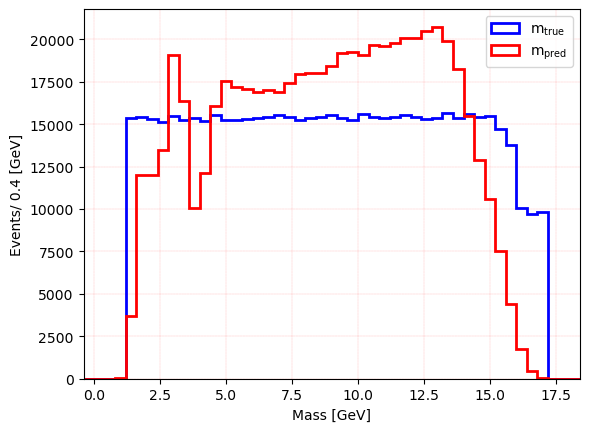

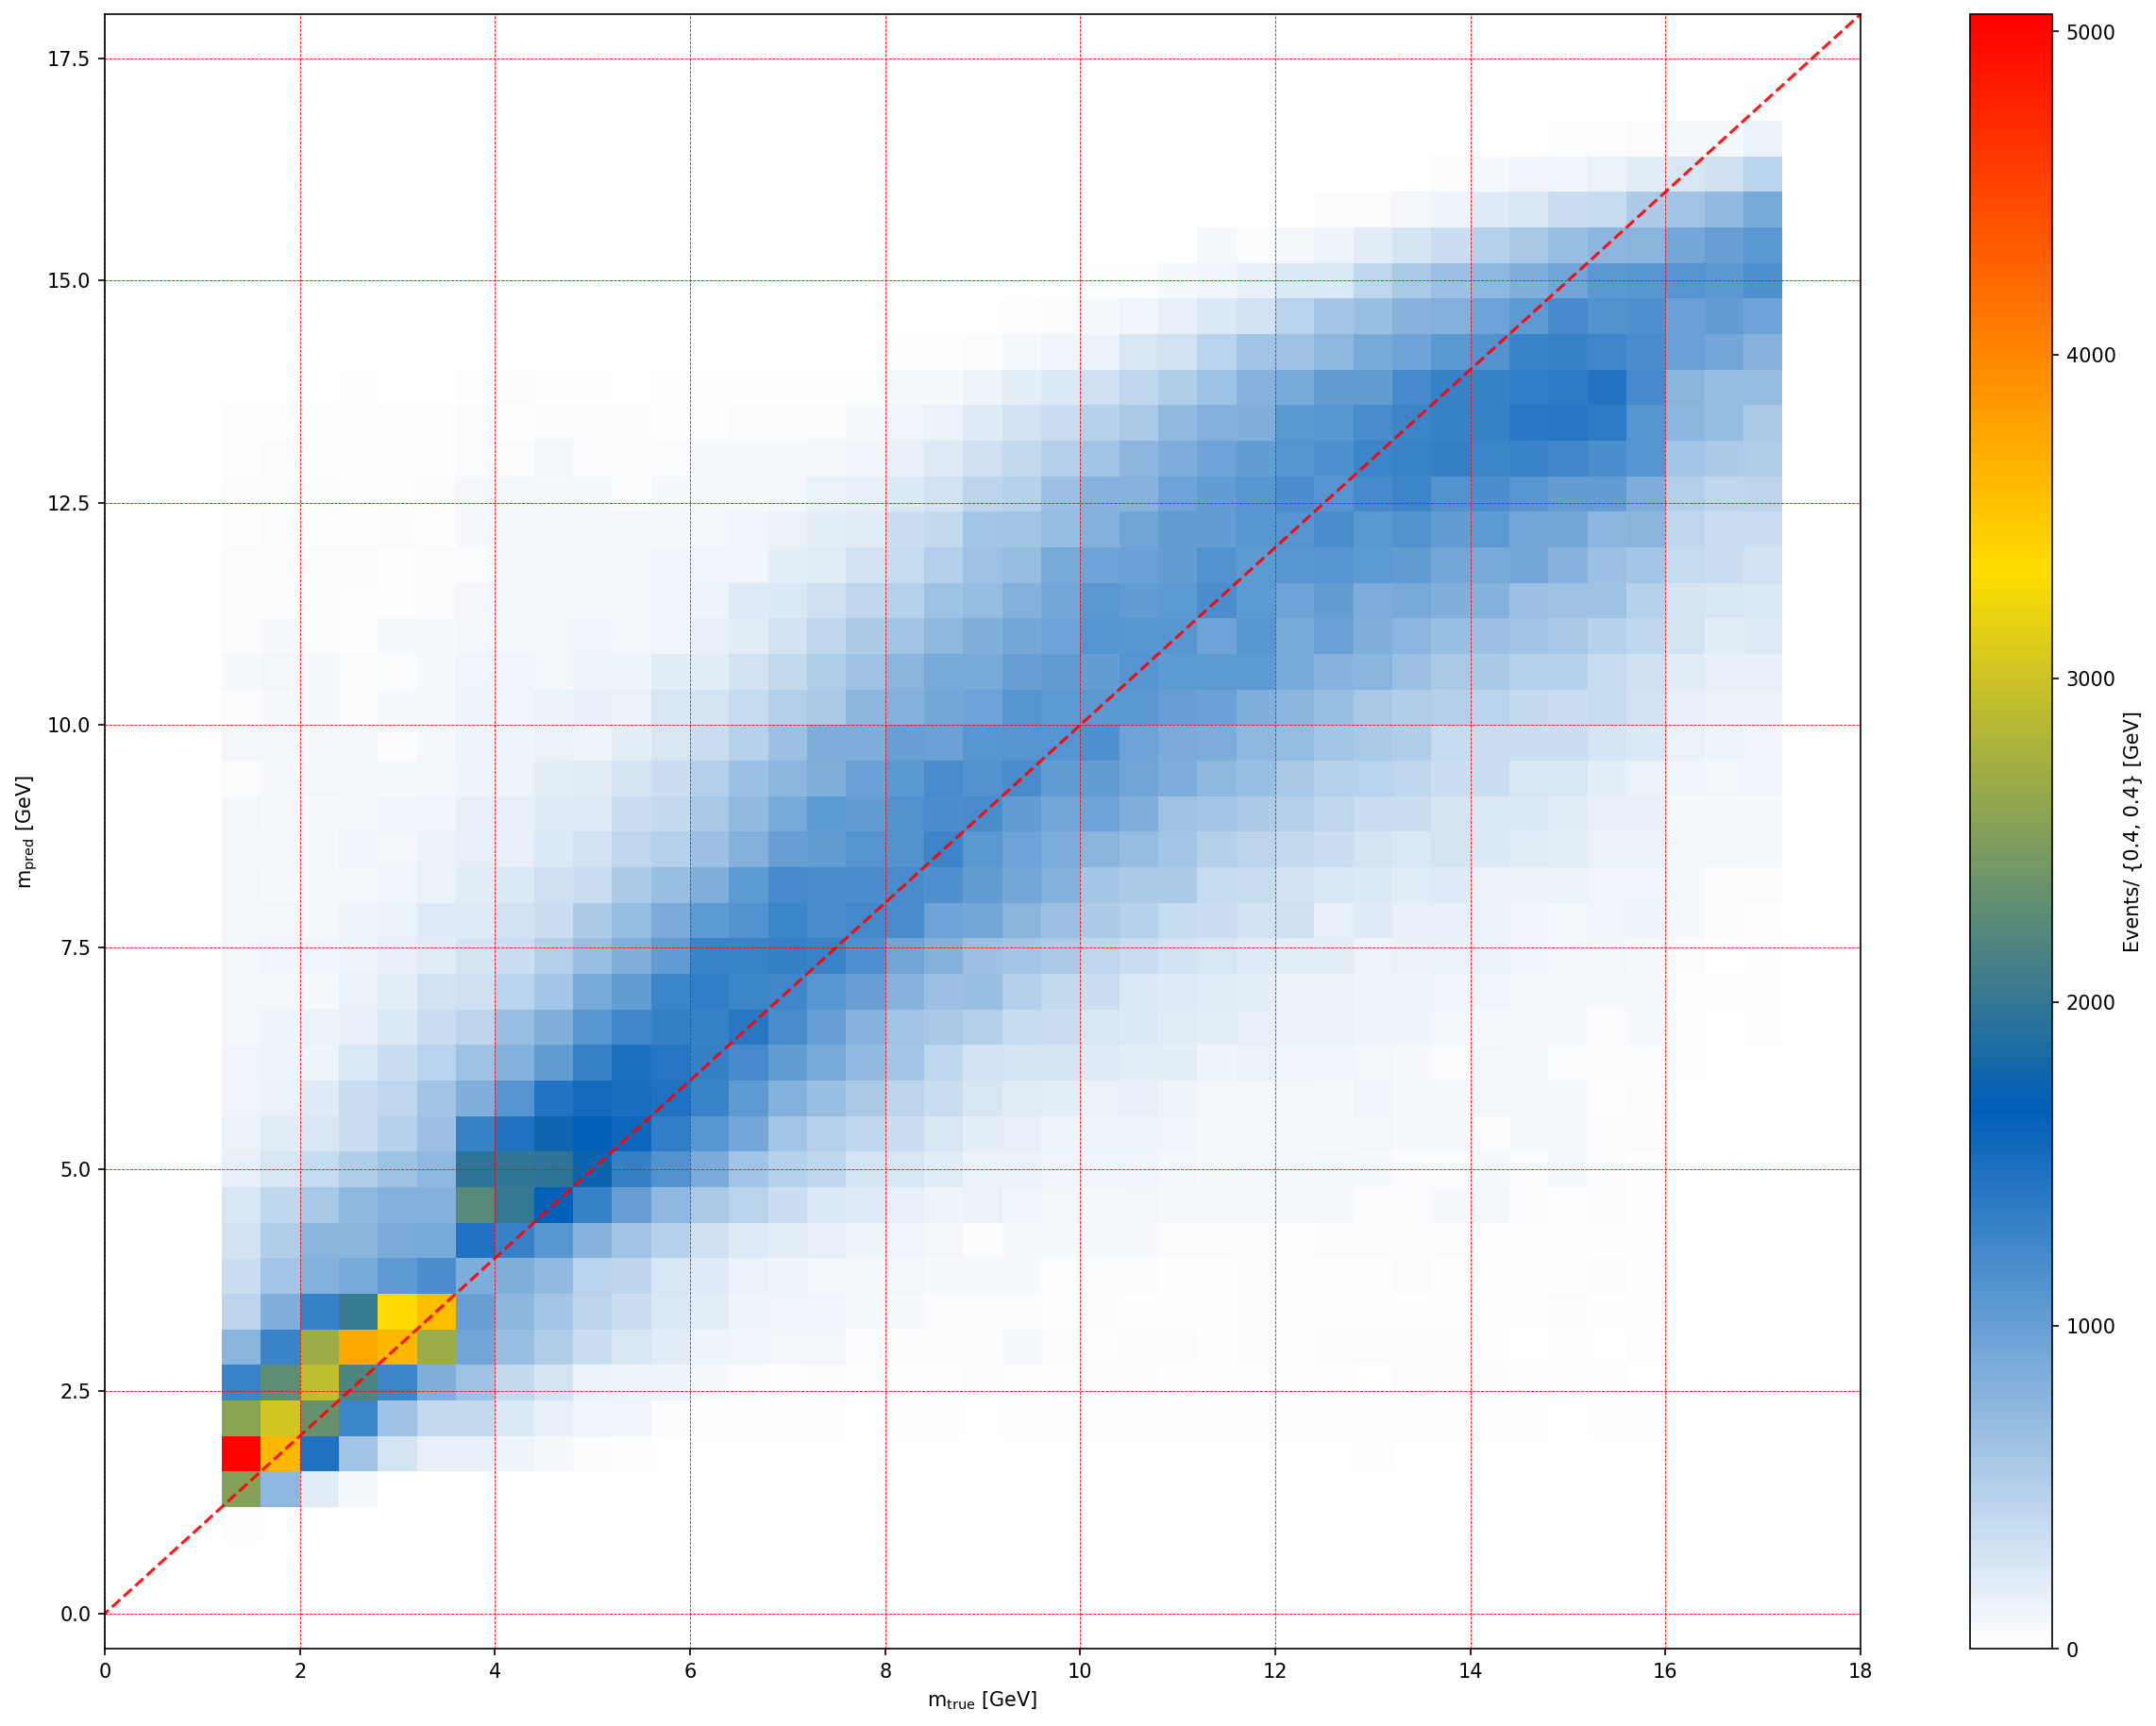

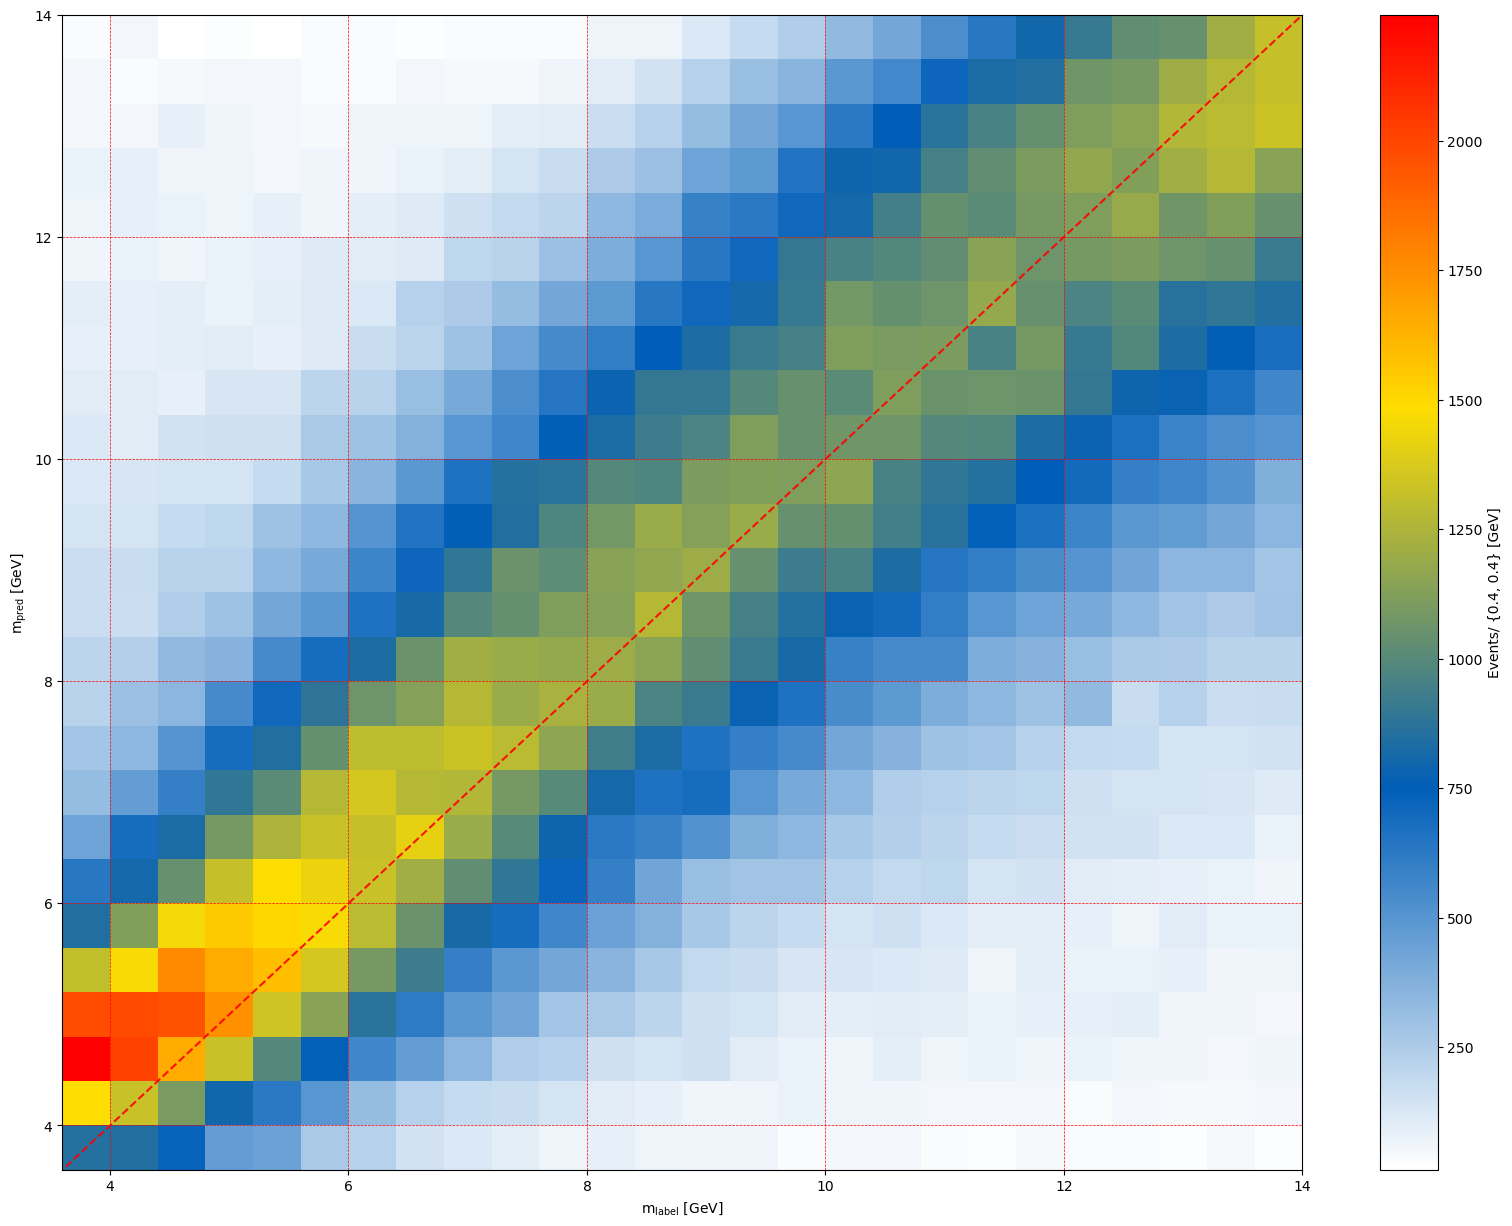

In [4]:
file_in =f'{parent_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'

infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m_true_=data["m_true"]
m_pred_=data["m_pred"]
m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)  


m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
# hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(3.6, 14.1, .8),size=15)
# plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

# hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()
exit


In [5]:
data.keys()

dict_keys(['m_true', 'm_pred', 'mae', 'mre'])

# --------------- Test on signals signal------------------

12
1 files found
keys----- dict_keys(['m_true', 'm_pred', 'mae', 'mre', 'm0'])


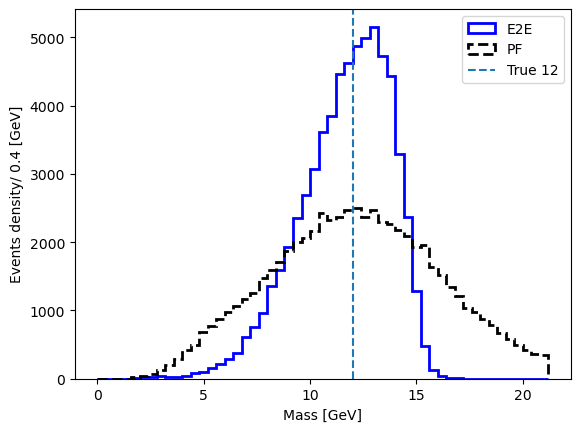

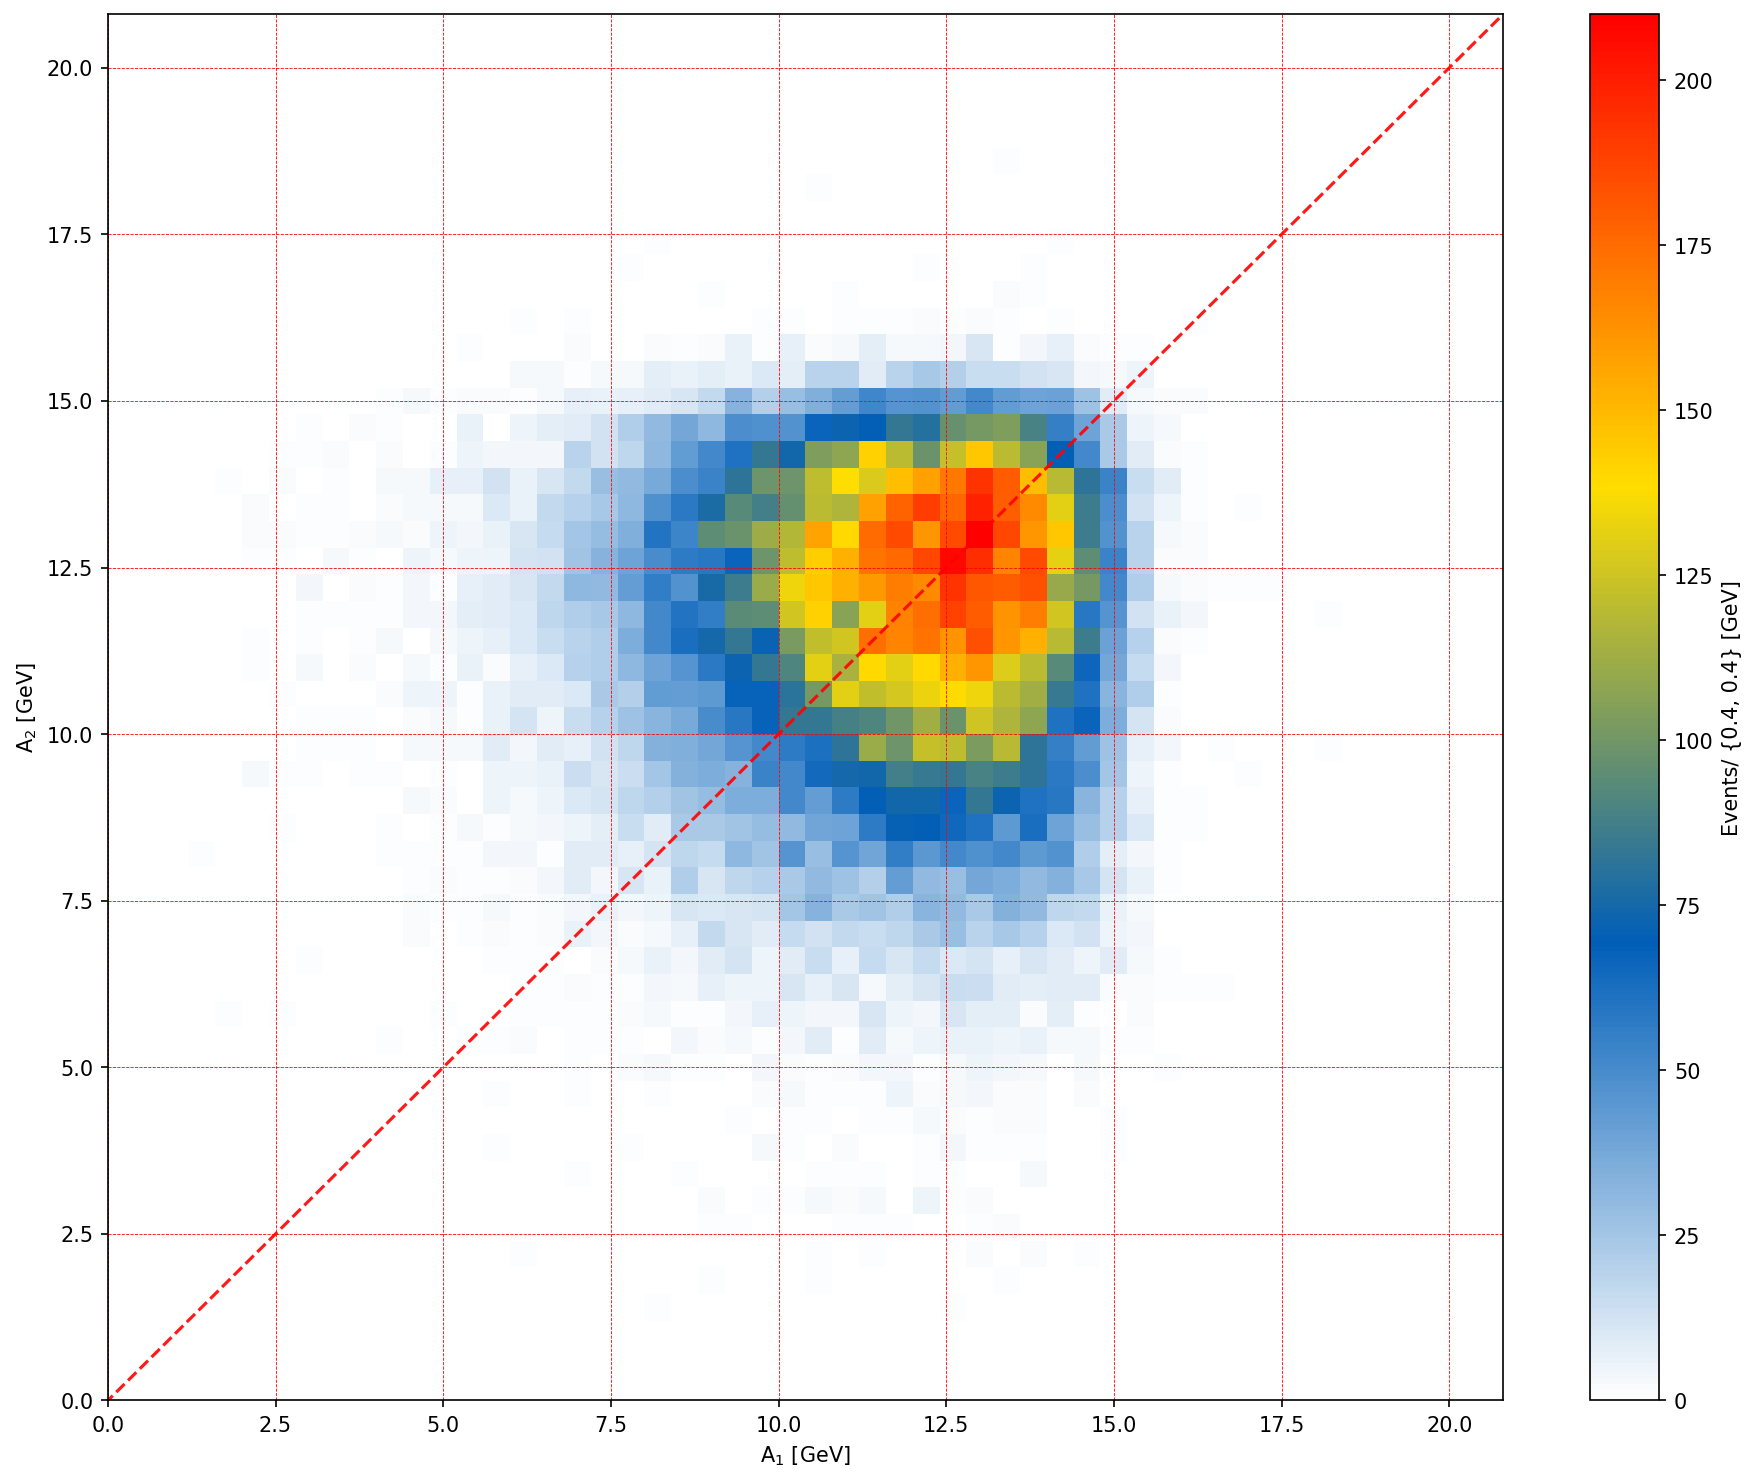

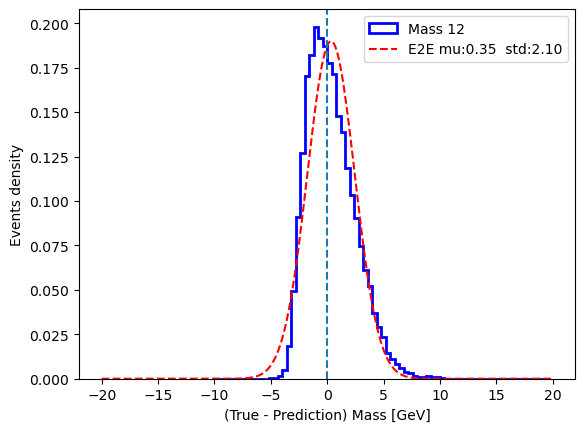

In [6]:
Mass = '12'
mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
print(mass)
paths=np.sort(glob.glob(f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
assert len(paths) > 0
print(f"{len(paths)} files found")

m0_min = 0.8
m0_max = 17.2
bin_size = 0.4




infile = open(f"{paths[0]}", "rb")
data = pickle.load(infile)
print("keys-----", data.keys())
infile.close()
m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m0_ = data["m0"]

m0 = 1.2
m0_max = 20
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(0,m0_max+1.2, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='E2E')
plt.hist(np.array(m0_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='black', linewidth=2, label='PF')
# plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='best')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 

m_pred_1 =[]
m_pred_2 =[]

for i in range(len(m_pred_)): 
    try:
        if i%2: m_pred_1.append(m_pred_[i])
        else: m_pred_2.append(m_pred_[i])
    except:
        if i==0: continue
        if i%2: m_pred_1.append(m_pred_[i])
        else: m_pred_2.append(m_pred_[i])
    

fig, ax = plt.subplots(figsize=(15,12), dpi=150)
plt.hist2d(np.squeeze(m_pred_1), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-0.8, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{1}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{2}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
# plt.yticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary A Mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

residuals = m_true_ - m_pred_
mu, std = norm.fit(residuals)
x = np.linspace(-20,20, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.squeeze(residuals),bins=np.arange(-10, 20, .4),density=True, histtype='step',  linestyle='-', color='b', linewidth=2, label=f"Mass {Mass}")
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= 0,linestyle='--')
plt.xlabel('(True - Prediction) Mass [GeV]')
plt.ylabel('Events density')
plt.legend(loc='best')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 

### Gaussian fit to prediction

In [7]:
mass = '5'
Mass = 5
local=f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{mass}_H_AA_4Tau'
rhFileList = '%s/epoch10_val_pseudoscala*.pkl'%(local)
paths = np.sort(glob.glob(rhFileList))
assert len(paths) > 0
print(f"{len(paths)} files found")

1 files found


loaded data file ------>  /pscratch/sd/e/ereinha/DepthwiseCrossViTMAE/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9787_inference_data.pkl


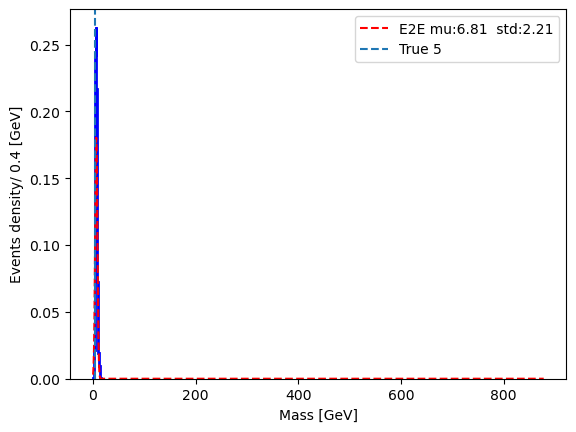

In [8]:
epoch=5

data_file = paths[0]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]
m0 = 1.2
m0_max = 17.2
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(min(m_pred_),max(m_pred_), num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(),density=True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2)
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= Mass,linestyle='--',label=f'True {mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

### fitting gaussion to residuals

In [5]:
def get_hist_mode(data, bins=100):
    counts, bin_edges = np.histogram(data, bins=bins)

    # Find the index of the mode bin
    mode_bin_index = np.argmax(counts)

    # Get the mode bin range
    mode_bin_start = bin_edges[mode_bin_index]
    mode_bin_end = bin_edges[mode_bin_index + 1]
    
    return (mode_bin_end + mode_bin_start)/2

In [6]:
def compute_uncertainty(data, n_bootstraps=1000):
    mode_bins = []

    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        counts, bin_edges = np.histogram(bootstrap_sample, bins=30)
        mode_bin_index = np.argmax(counts)
        mode_bin_start = bin_edges[mode_bin_index]
        mode_bin_end = bin_edges[mode_bin_index + 1]
        mode_bins.append((mode_bin_start + mode_bin_end) / 2)

    return np.std(mode_bins)

def find_convergence(data, initial_bootstraps=1000, max_bootstraps=100000, step=1000, threshold=0.01):
    n_bootstraps = initial_bootstraps
    prev_uncertainty = compute_uncertainty(data, n_bootstraps)
    uncertainties = [(n_bootstraps, prev_uncertainty)]
    
    while n_bootstraps <= max_bootstraps:
        n_bootstraps += step
        current_uncertainty = compute_uncertainty(data, n_bootstraps)
        uncertainties.append((n_bootstraps, current_uncertainty))
        
        # Check for convergence
        if abs(current_uncertainty - prev_uncertainty) < threshold:
            print(f"Converged after {n_bootstraps} bootstraps.")
            break
            
        prev_uncertainty = current_uncertainty
    
    return prev_uncertainty, n_bootstraps

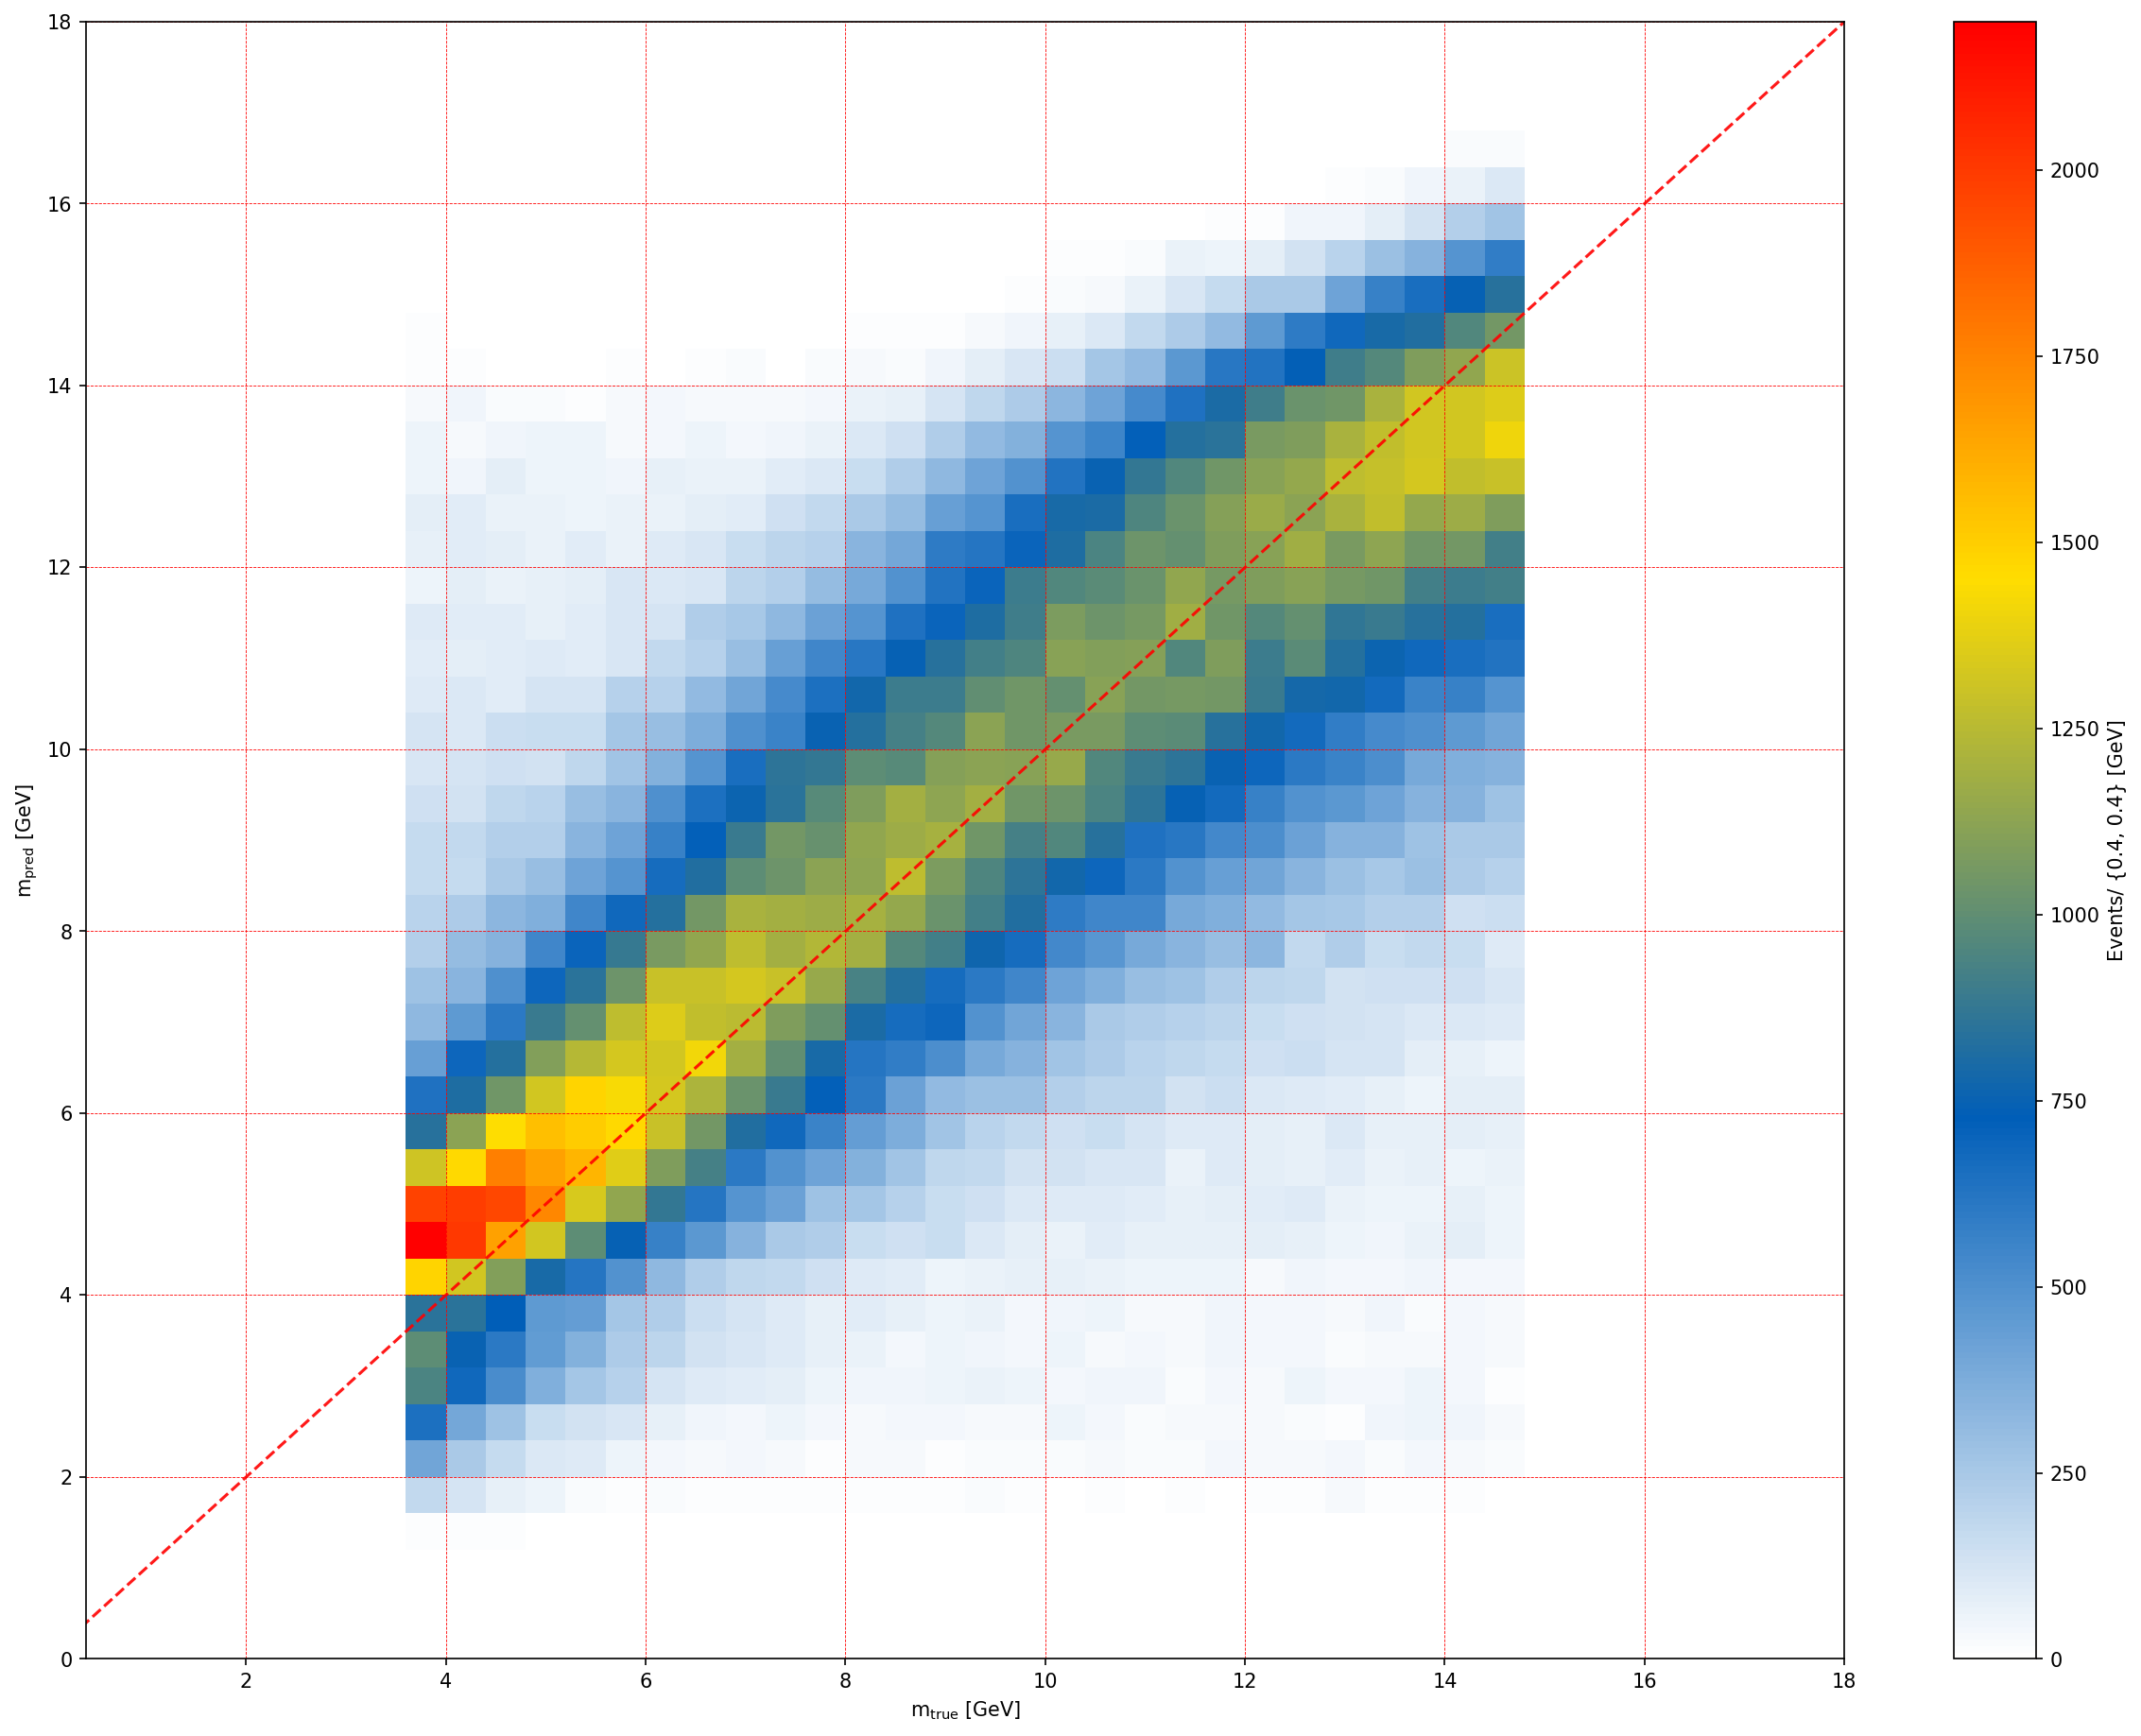

Converged after 14000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged

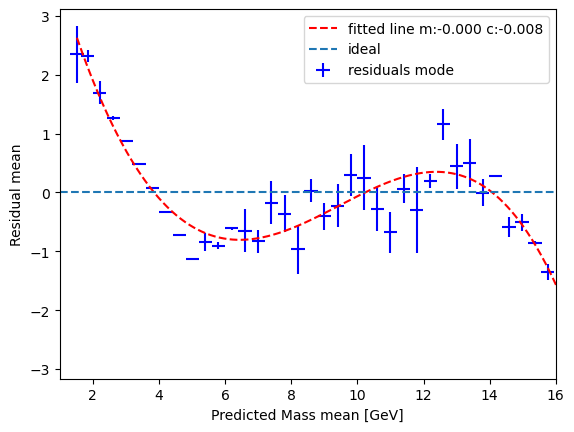

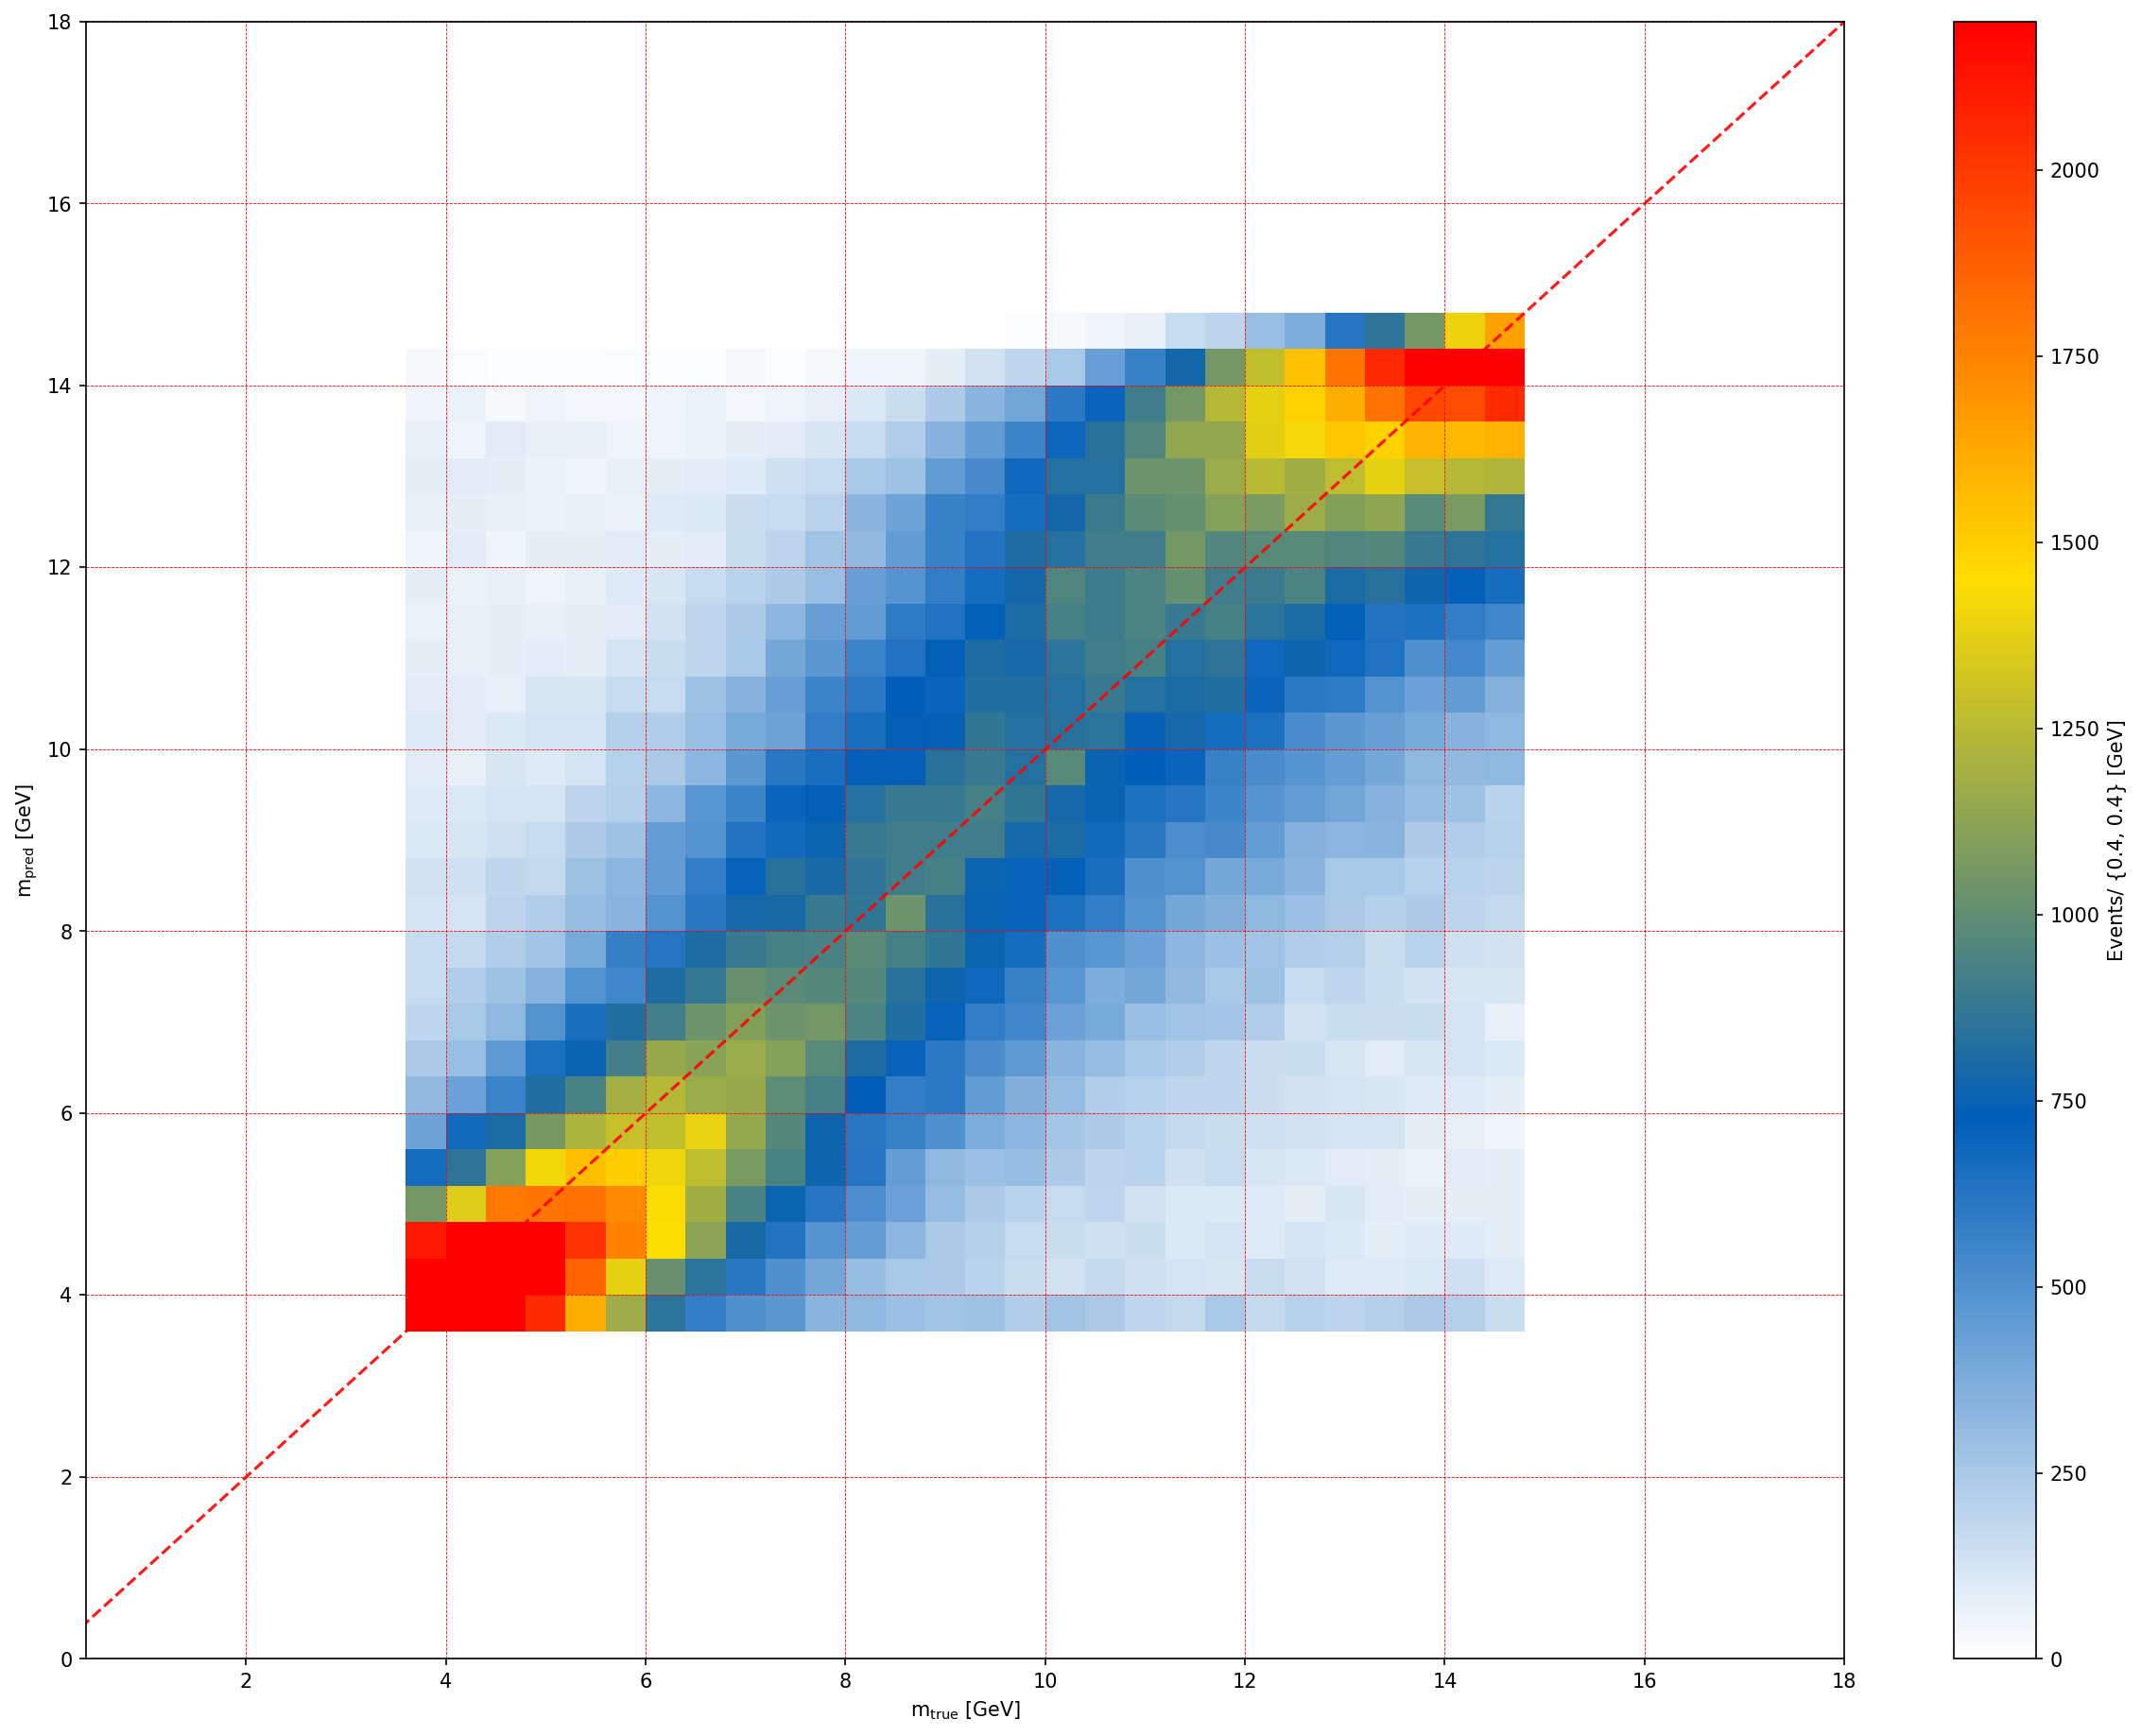

/global/common/software/nersc/pm-2022q4/sw/pytorch/2.0.1/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/common/software/nersc/pm-2022q4/sw/pytorch/2.0.1/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/global/common/software/nersc/pm-2022q4/sw/pytorch/2.0.1/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/global/common/software/nersc/pm-2022q4/sw/pytorch/2.0.1/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 4000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 4000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 4000 bootstraps.
Converged after 3000 bootstraps.
Converged after 3000 bootstraps.
Converged after 3000 bootstraps.
Converged after 3000 bootstraps.
Converged 

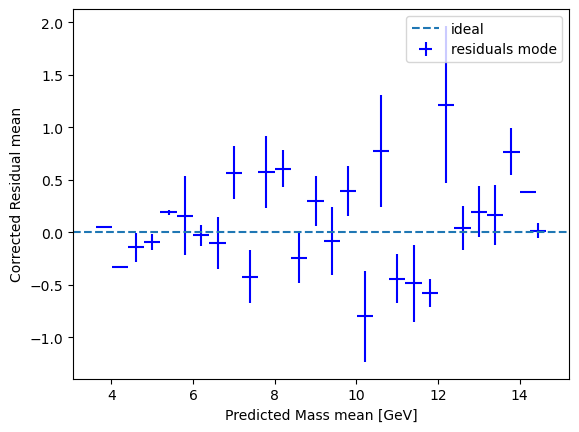

In [7]:
file_in =f'{parent_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'



infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m0_min = 1.2
m0_max = 17.2


m_true_=data["m_true"]
m_pred_=data["m_pred"]
m_true = np.concatenate(m_true_).flatten()
m_pred = np.concatenate(m_pred_).flatten()
mask = (m_true > 3.6) & (m_true < 14.8)
m_pred = m_pred[mask]
m_true = m_true[mask]

# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true),np.squeeze(m_pred), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap, vmin=0, vmax=2200)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Initial calculations
bins = np.arange(1.2, 17.2, 0.4)
mean_pred_bins = []
mean_true_bins = []
residuals_mean = []
residuals_std = []
residuals_mode = []
mode_errors = []
for i in range(len(bins) - 1):
    temp_mass_pred = m_pred[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = m_true[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    mean_true_bins.append(np.mean(temp_mass_true))
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = temp_residual.mean(), temp_residual.std()
    residuals_mean.append(mu)
    residuals_std.append(std)
    residuals_mode.append(get_hist_mode(temp_residual))
    uncertainty, n_bootstraps = find_convergence(temp_residual)
    mode_errors.append(uncertainty)

# Polynomial fit
coeff_mean = np.polyfit(mean_pred_bins, residuals_mode, 4)
polynomial_mean = np.poly1d(coeff_mean)
x = np.linspace(min(mean_pred_bins), max(mean_pred_bins), num=1000)
y_fit_mean = polynomial_mean(x)

# First plot with error bars
fig, ax = plt.subplots()
plt.errorbar(mean_pred_bins, residuals_mode, xerr=(bins[1] - bins[0]) / 2, yerr=mode_errors, fmt='none', color='b', label='residuals mode')
plt.plot(x, y_fit_mean, color='r', linestyle='--', label=f"fitted line m:{coeff_mean[0]:.3f} c:{coeff_mean[1]:.3f}")
plt.xlim(1, 16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual mean")
plt.legend()
plt.show()

# Correction function
def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

# Load the data again for corrected predictions
infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_true = np.concatenate(m_true_).flatten()
m_pred = np.concatenate(m_pred_).flatten()
mask = (m_true > 3.6) & (m_true < 14.8)
m_pred = m_pred[mask]
m_true = m_true[mask]
m_pred = corrected_pred(m_pred)

# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true),np.squeeze(m_pred), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap,vmin=0, vmax=2200)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Recalculate for corrected predictions
mean_pred_bins = []
mean_true_bins = []
residuals_mean_2 = []
residuals_std_2 = []
residuals_mode_2 = []
mode_errors_2 = []
for i in range(len(bins) - 1):
    temp_mass_pred = m_pred[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = m_true[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    mean_true_bins.append(np.mean(temp_mass_true))
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean_2.append(mu)
    residuals_std_2.append(std)
    residuals_mode_2.append(get_hist_mode(temp_residual))
    uncertainty, n_bootstraps = find_convergence(temp_residual)
    mode_errors_2.append(uncertainty)

# Second plot with error bars
fig, ax = plt.subplots()
plt.errorbar(mean_pred_bins, residuals_mode_2, xerr=(bins[1] - bins[0]) / 2, yerr=mode_errors_2, fmt='none', color='b', label='residuals mode')
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual mean")
plt.legend()
plt.show()


In [34]:
print(polynomial_mean)

            4            3          2
-9.106e-05 x - 0.007579 x + 0.2641 x - 2.361 x + 5.63


### Corrected pridictions

In [8]:
def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

In [9]:
def plot_1d(corrected=False, file_in=f'{parent_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'):
    infile = open(f"{file_in}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_=data["m_true"]
    m_pred_=data["m_pred"]
    m_true_ = np.concatenate(m_true_)
    m_pred_ = np.concatenate(m_pred_)  
    mask = (m_true_ > 3.6) & (m_true_ < 14.8)
    m_pred_ = m_pred_[mask]
    m_true_ = m_true_[mask]
    if corrected: m_pred_ = corrected_pred(m_pred_)

    for i in range(len(bins) - 1):
        temp_mass_pred = m_pred_[(m_pred_ >= bins[i]) & (m_pred_ < bins[i + 1])]
        temp_mean_mass_pred = np.mean(temp_mass_pred)
        mean_pred_bins.append(temp_mean_mass_pred)
        temp_mass_true = np.mean(m_true_[(m_pred_ >= bins[i]) & (m_pred_ < bins[i + 1])])
        mean_true_bins.append(temp_mass_true)
        temp_residual = temp_mass_true - temp_mass_pred
    
    m0_min = 1.2
    m0_max = 17.2
    bin_size = 0.4
    fig, ax = plt.subplots()
    plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
    plt.xlim(m0_min-1.2,m0_max+1.2)
    # plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    # hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()



    # Extended version
    fig, ax = plt.subplots(figsize=(20,15), dpi=150)
    plt.hist2d(np.squeeze(m_true_),np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
    # plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
    plt.grid(color='r', linestyle='--', linewidth=.4)
    # hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

    # Truncated version
    fig, ax = plt.subplots(figsize=(20,15))
    hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(3.6, 14.1, .8),size=15)
    # plt.yticks(np.arange(3.6, 14.1, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
    plt.grid(color='r', linestyle='--', linewidth=.5)

    # hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
    plt.show()
    


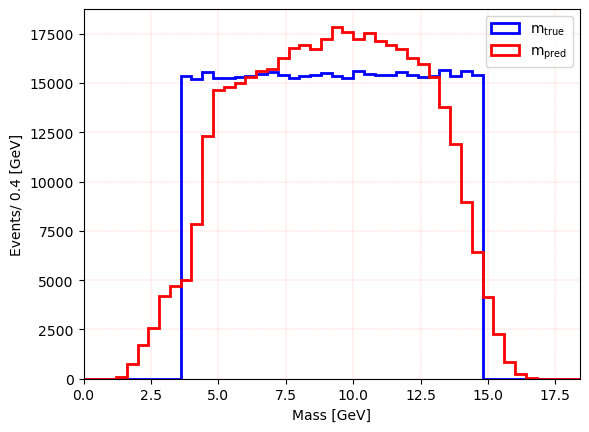

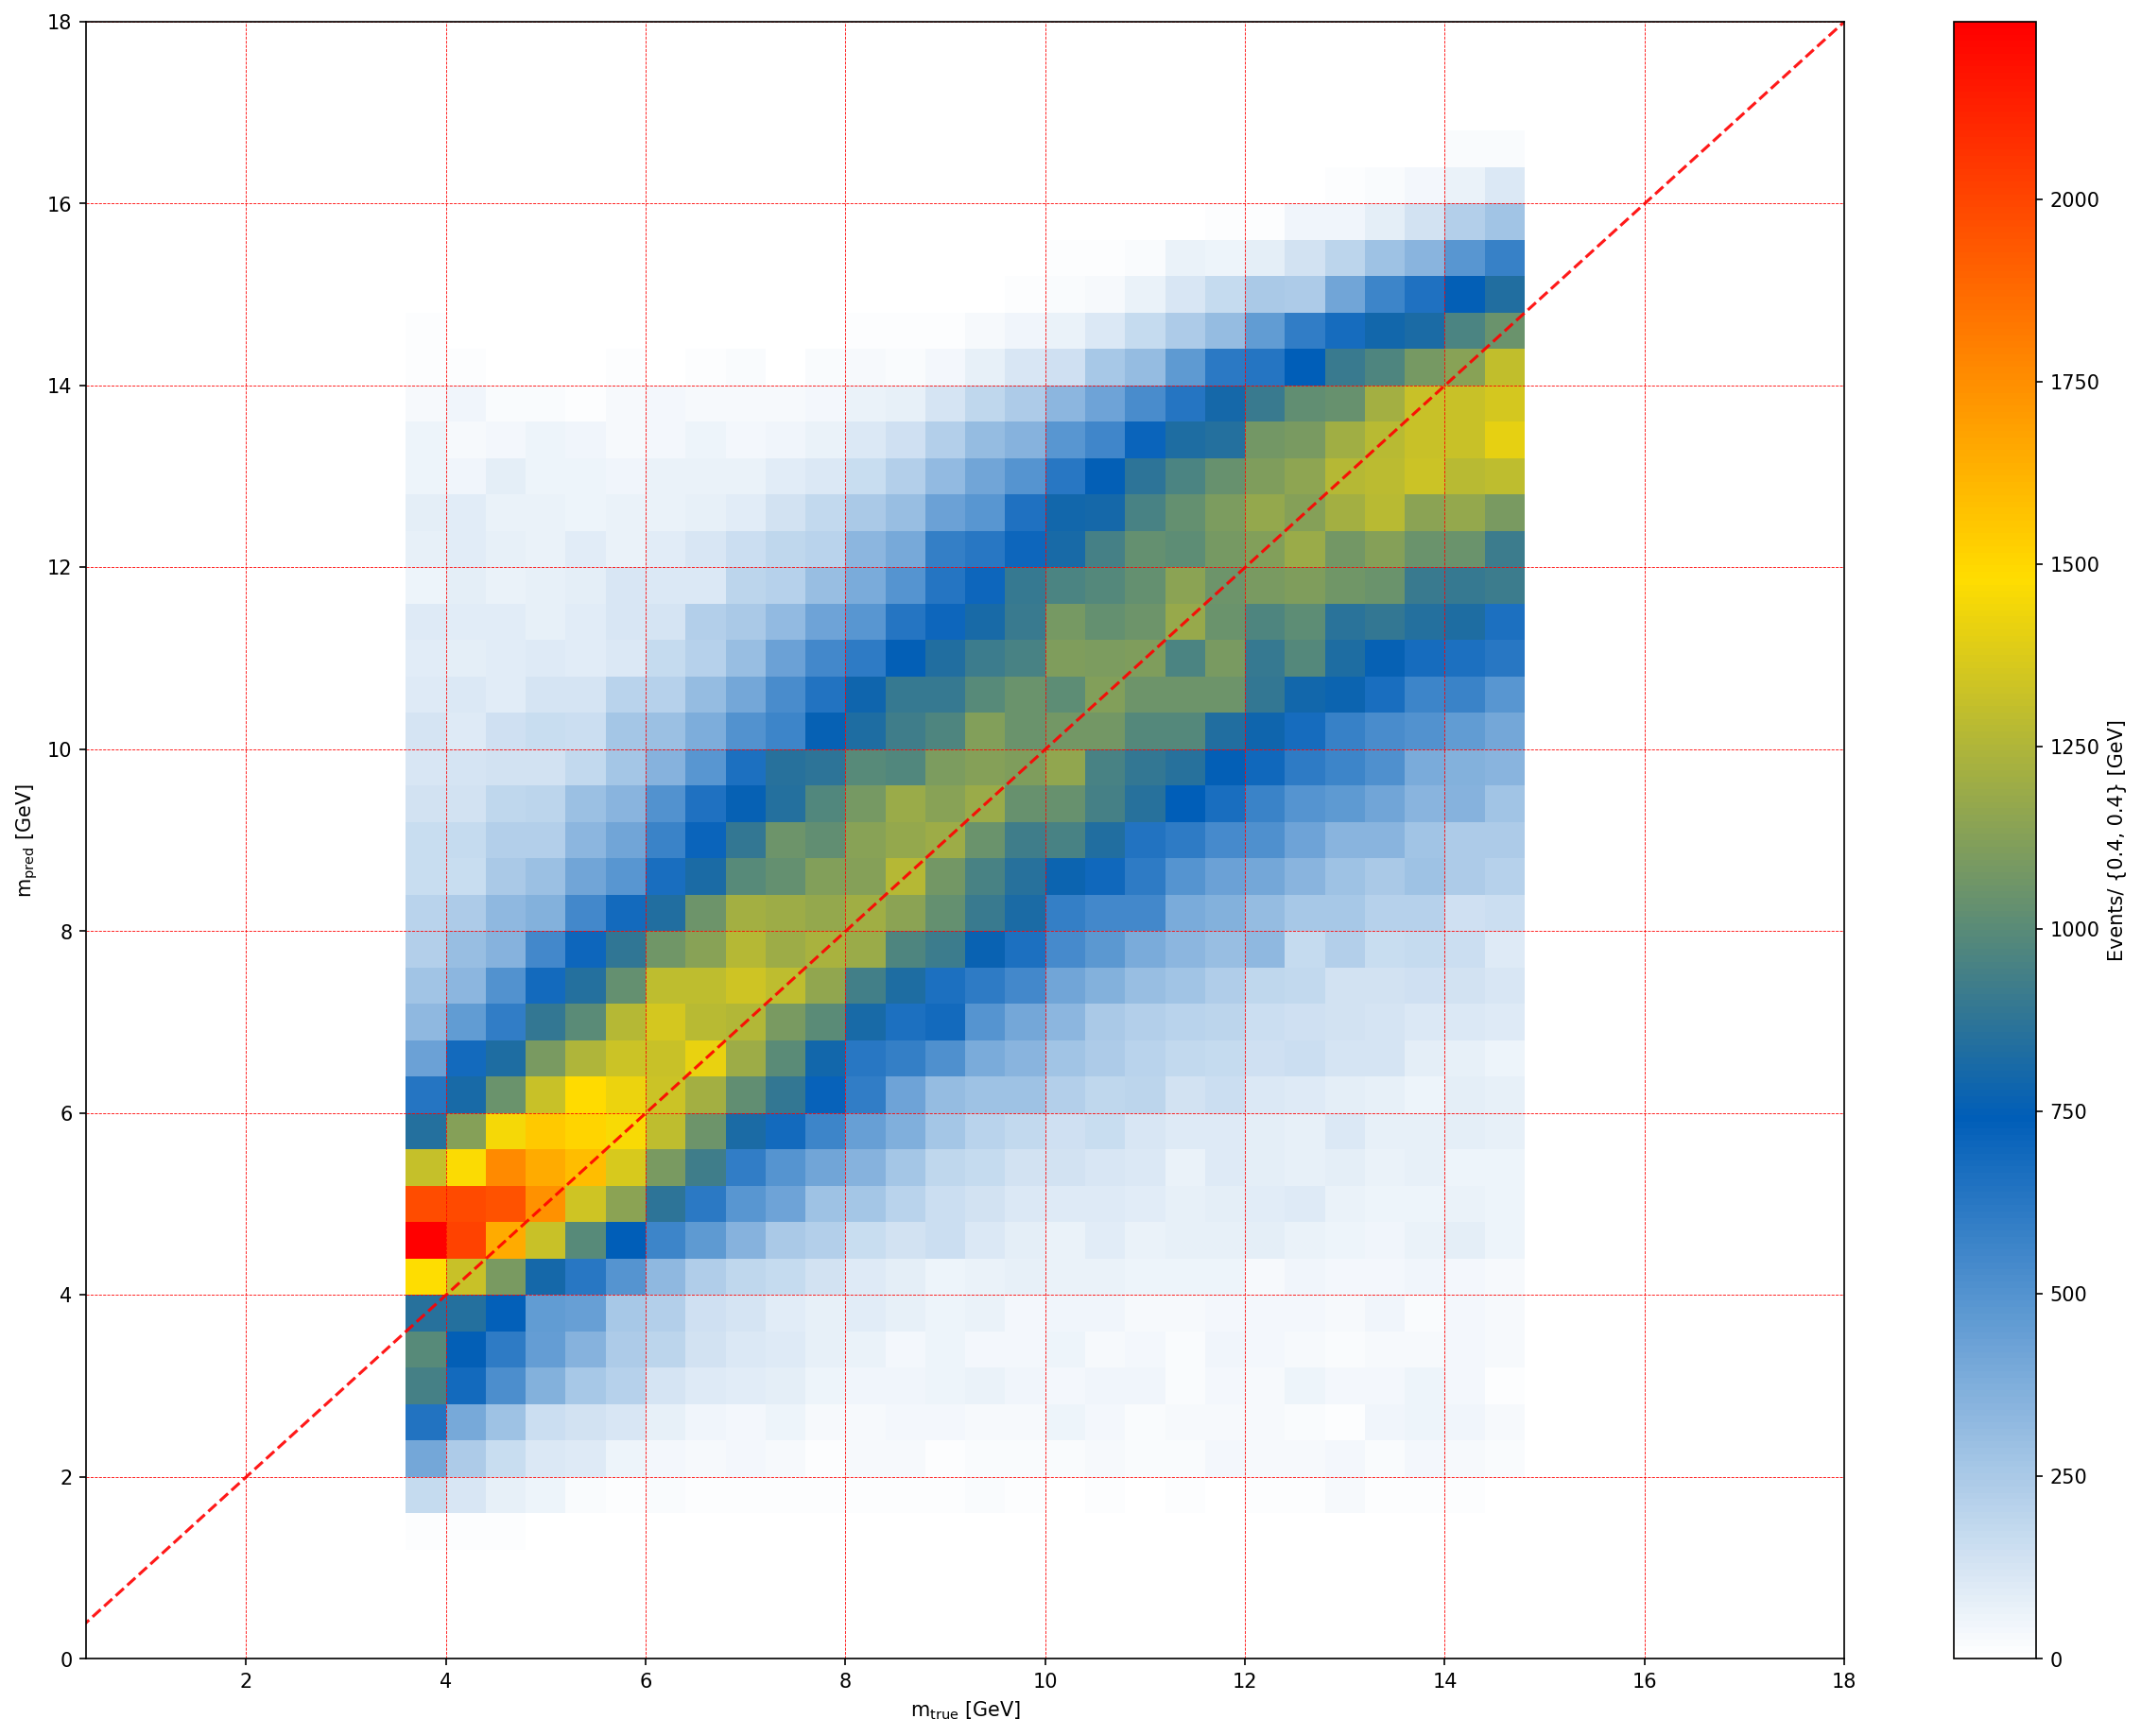

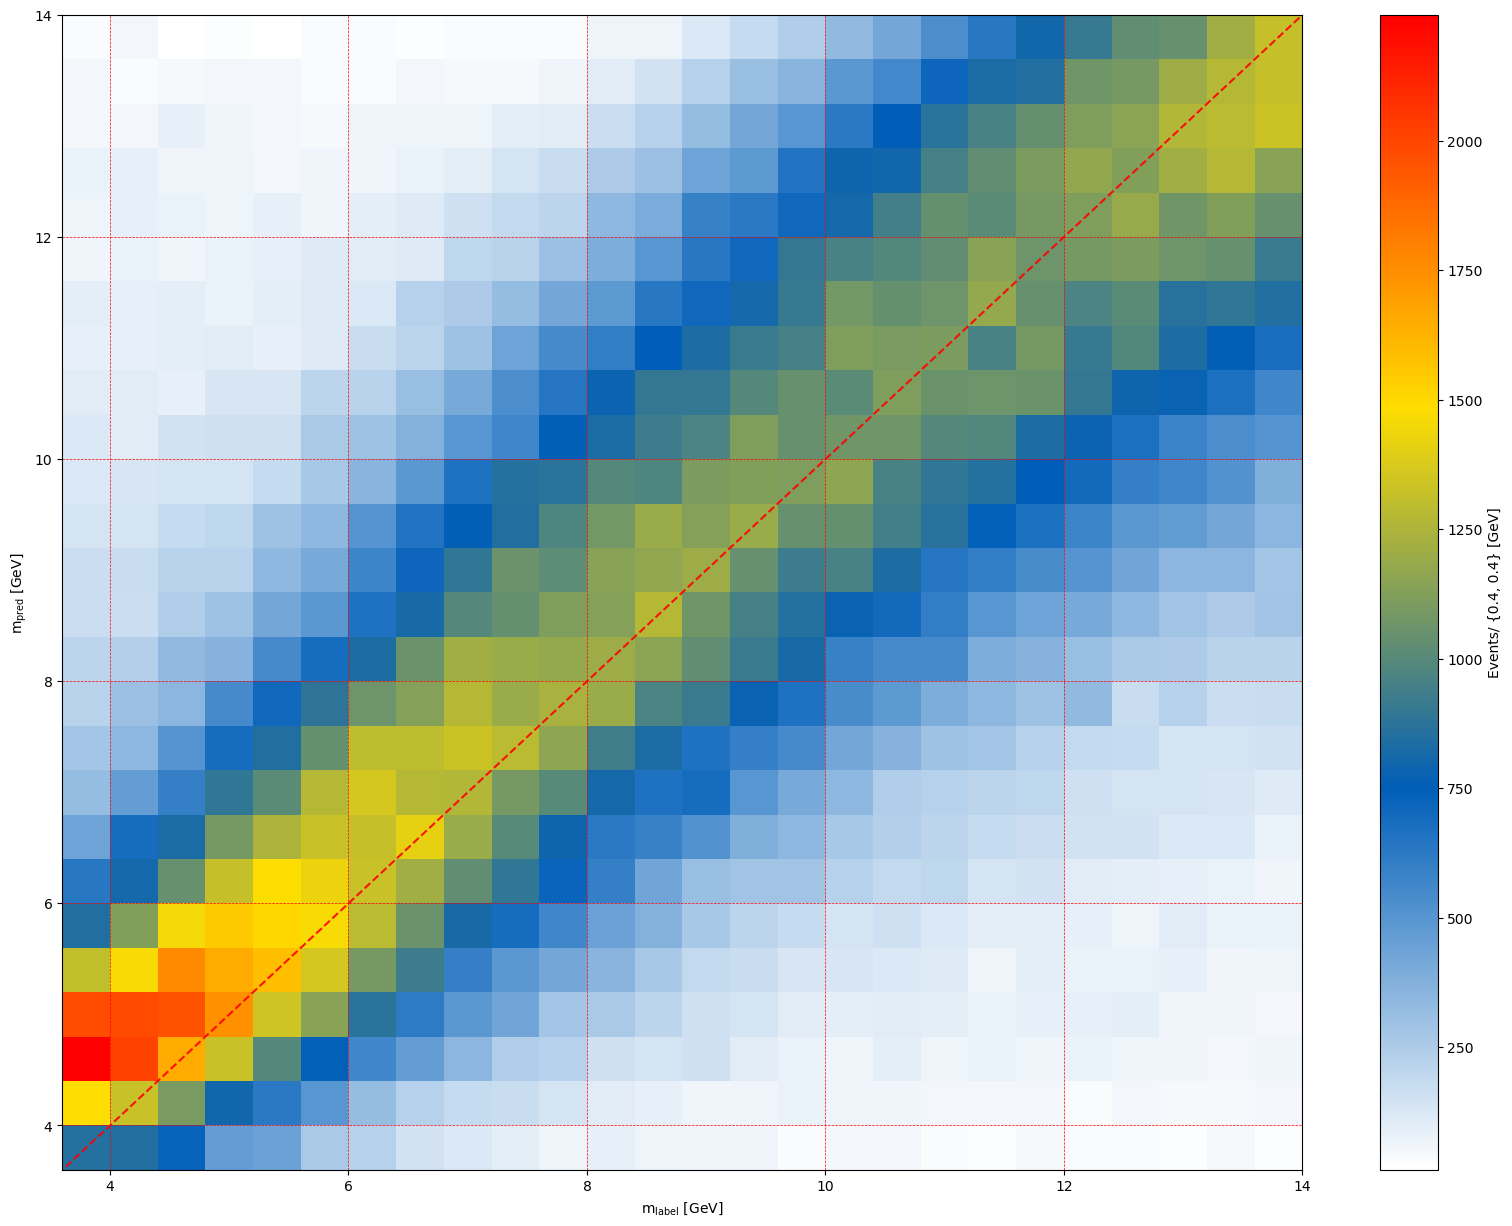

In [10]:
plot_1d(corrected=False)

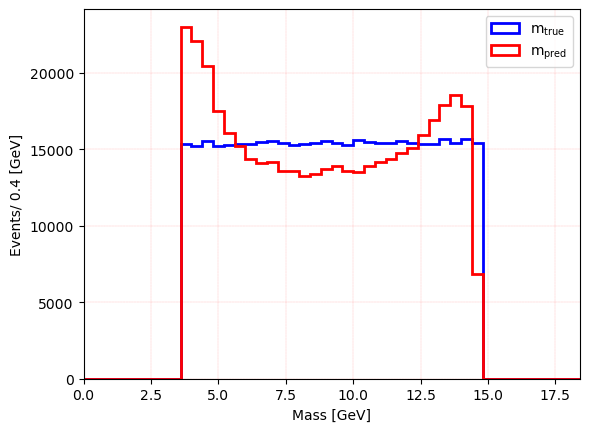

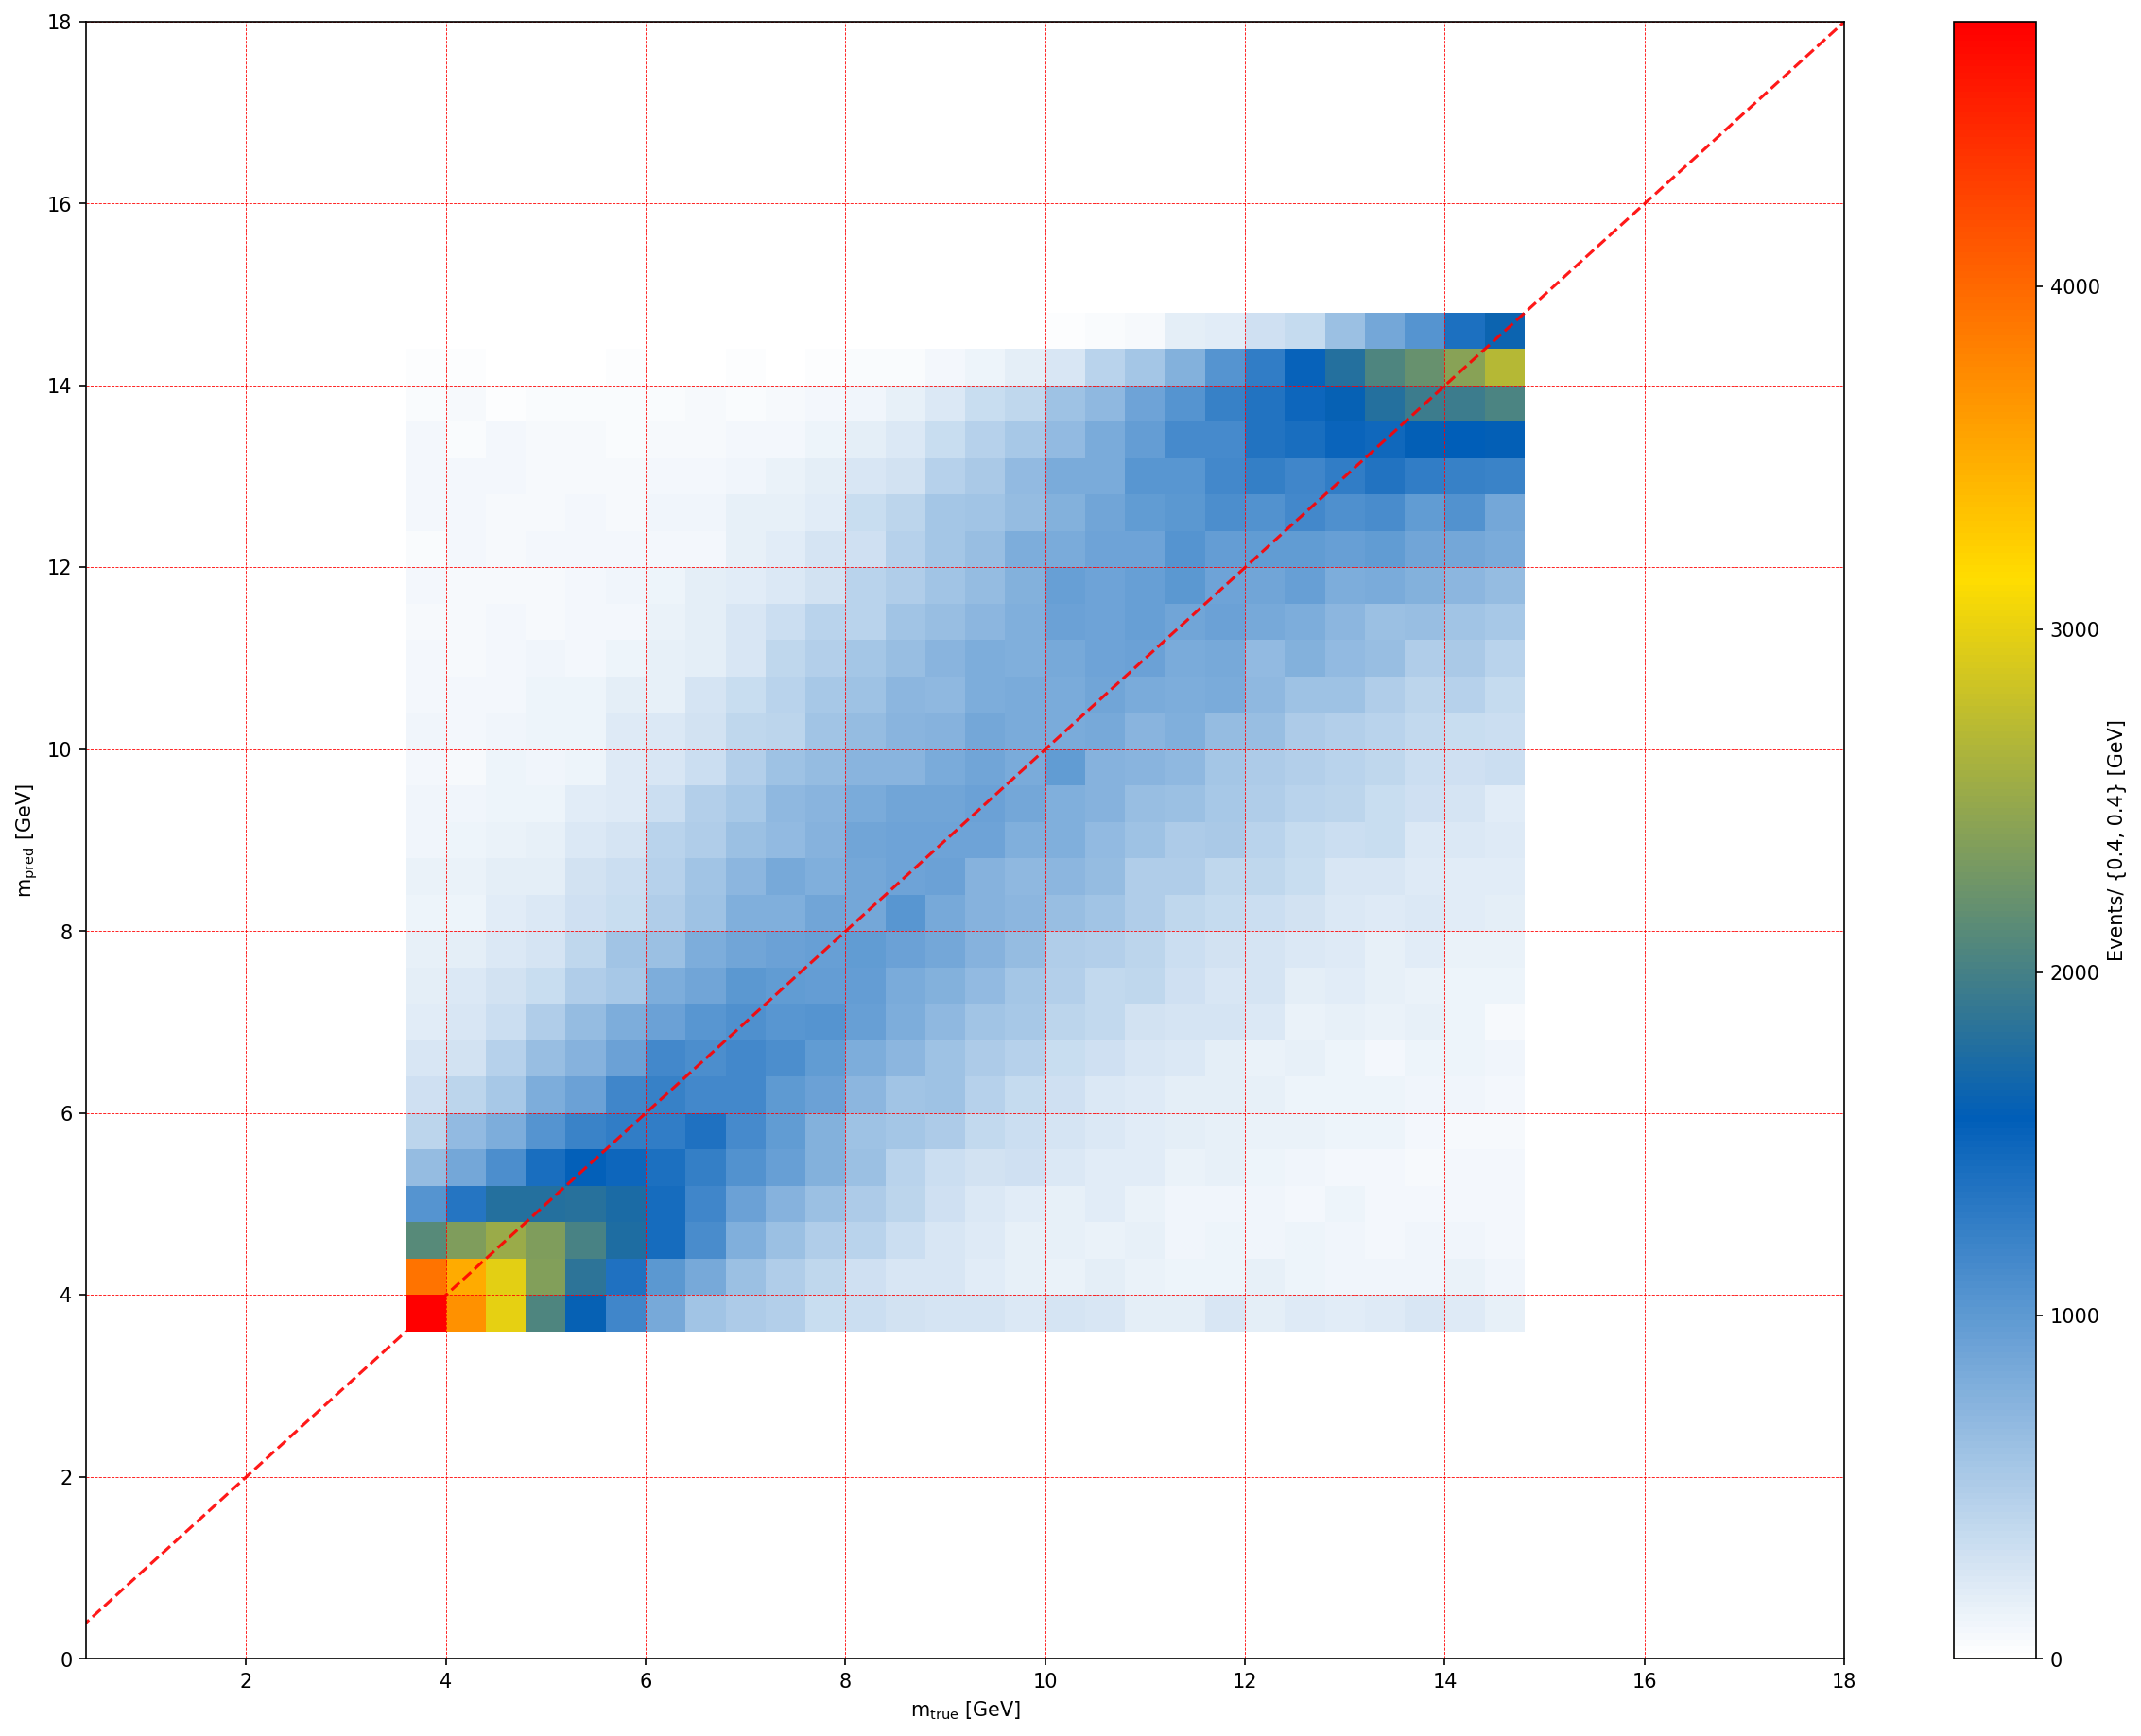

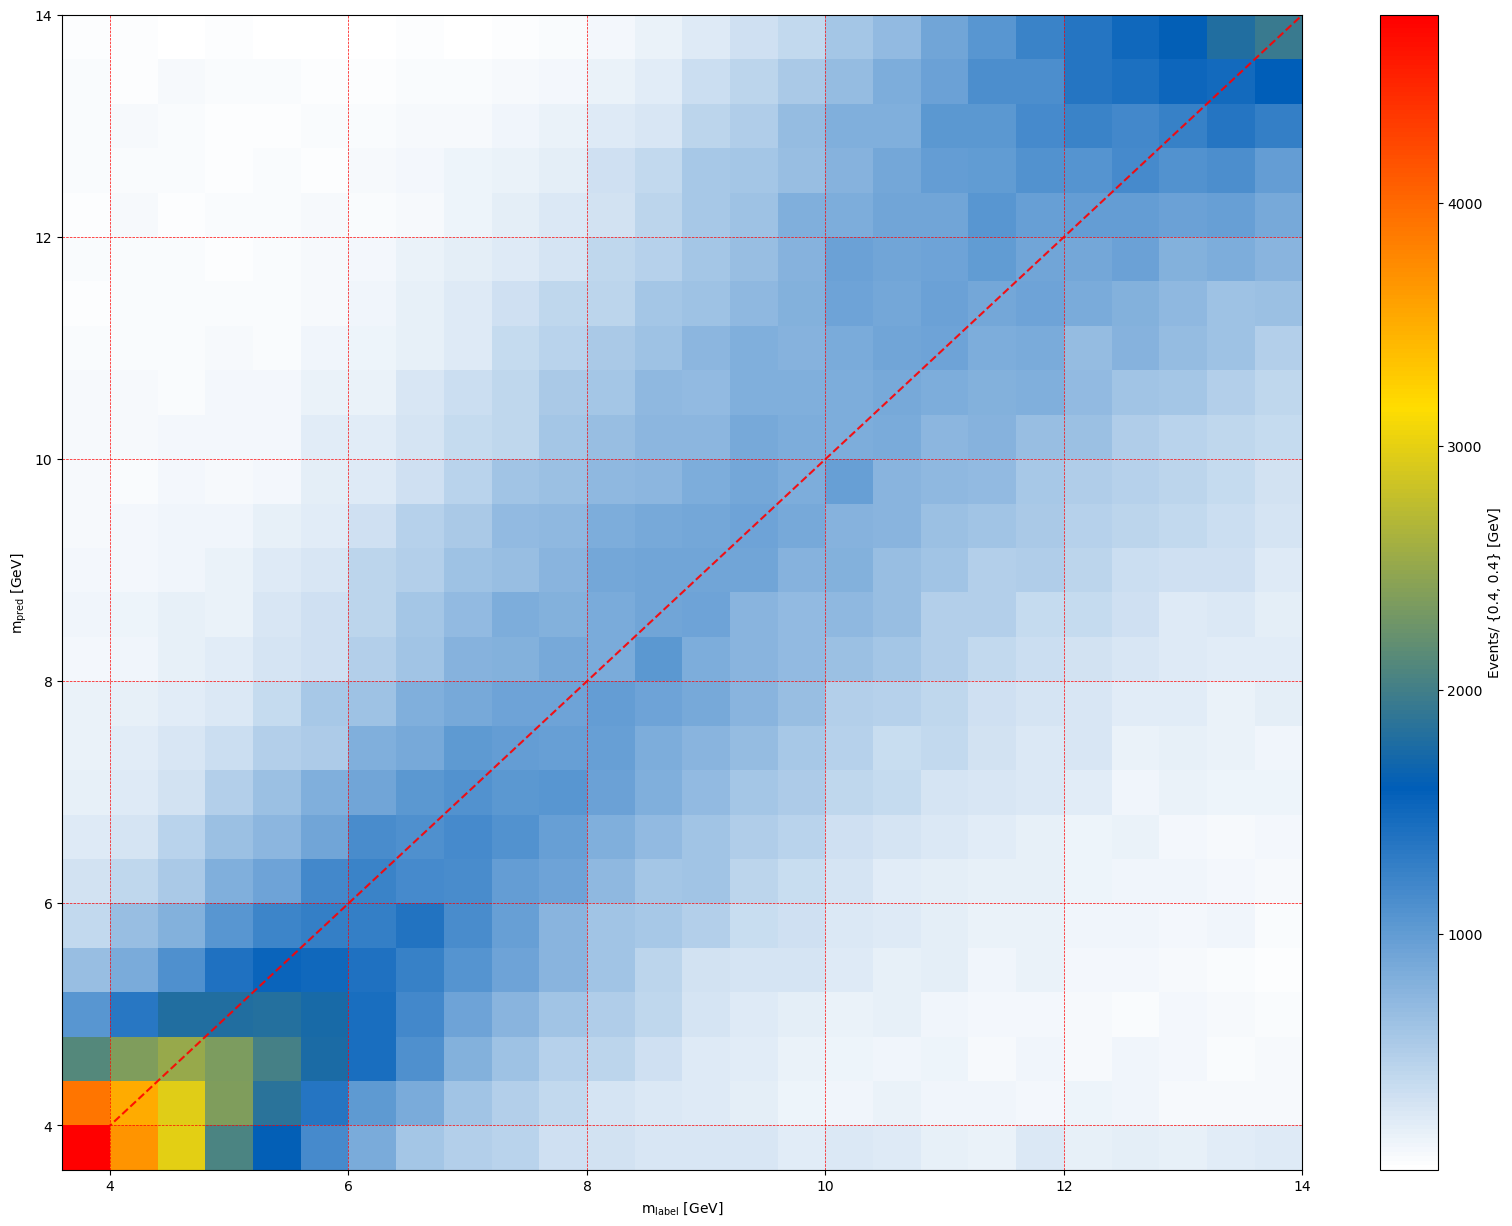

In [11]:
plot_1d(corrected=True)

In [12]:
def plot_signal(Mass = '5', corrected=False):
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    print("Signal Mass : ", mass)
    paths=np.sort(glob.glob(f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
    assert len(paths) > 0
    # print(f"{len(paths)} files found")

    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4




    infile = open(f"{paths[0]}", "rb")
    data = pickle.load(infile)
    # print("keys-----", data.keys())
    infile.close()
    m_true_ = data["m_true"]
    m_pred_ = data["m_pred"]
    m0_ = data["m0"]
    mask = (m_true_ > 3.6) & (m_true_ < 14.8)
    m_pred_ = m_pred_[mask]
    m_true_ = m_true_[mask]
    if corrected: m_pred_ = corrected_pred(m_pred_)

    m0 = 1.2
    m0_max = 20
    bin_size=0.4
    mu, std = norm.fit(m_pred_)
    x = np.linspace(0,m0_max+1.2, num=1000)
    y = norm.pdf(x, mu, std)

    fig, ax = plt.subplots()
    plt.hist(np.array(m_pred_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='E2E')
    plt.hist(np.array(m0_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='black', linewidth=2, label='PF')
    # plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
    plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events density/ 0.4 [GeV]')
    plt.legend(loc='best')
    # hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show() 

    m_pred_1 =[]
    m_pred_2 =[]
    residuals = []
    for i in range(len(m_pred_)): 
        try:
            if i%2: m_pred_1.append(m_pred_[i])
            else: m_pred_2.append(m_pred_[i])
        except:
            if i==0: continue
            if i%2: m_pred_1.append(m_pred_[i])
            else: m_pred_2.append(m_pred_[i])


    fig, ax = plt.subplots(figsize=(15,12), dpi=150)
    plt.hist2d(np.squeeze(m_pred_1), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-0.8, m0_max+1.2, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{A_{1}}$ [GeV]')
    plt.ylabel(r'$\mathrm{A_{2}}$ [GeV]')
    plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
    # plt.yticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
    plt.grid(color='r', linestyle='--', linewidth=.4)
    # hep.cms.label(llabel=f"Simulation Preliminary A Mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
    plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()  

In [13]:
Masses  = ['3p7', '4', '5', '6', '8', '10', '12', '14']

Signal Mass :  3.7


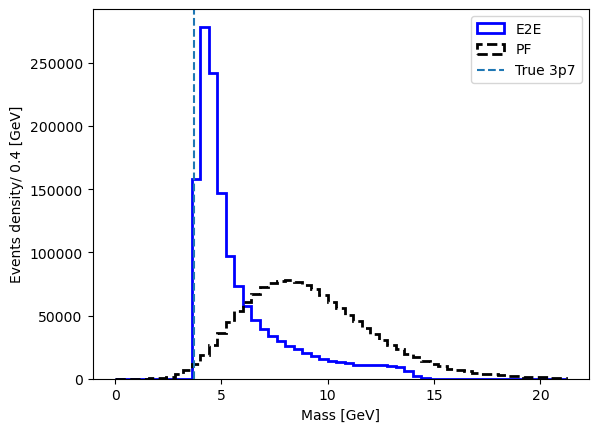

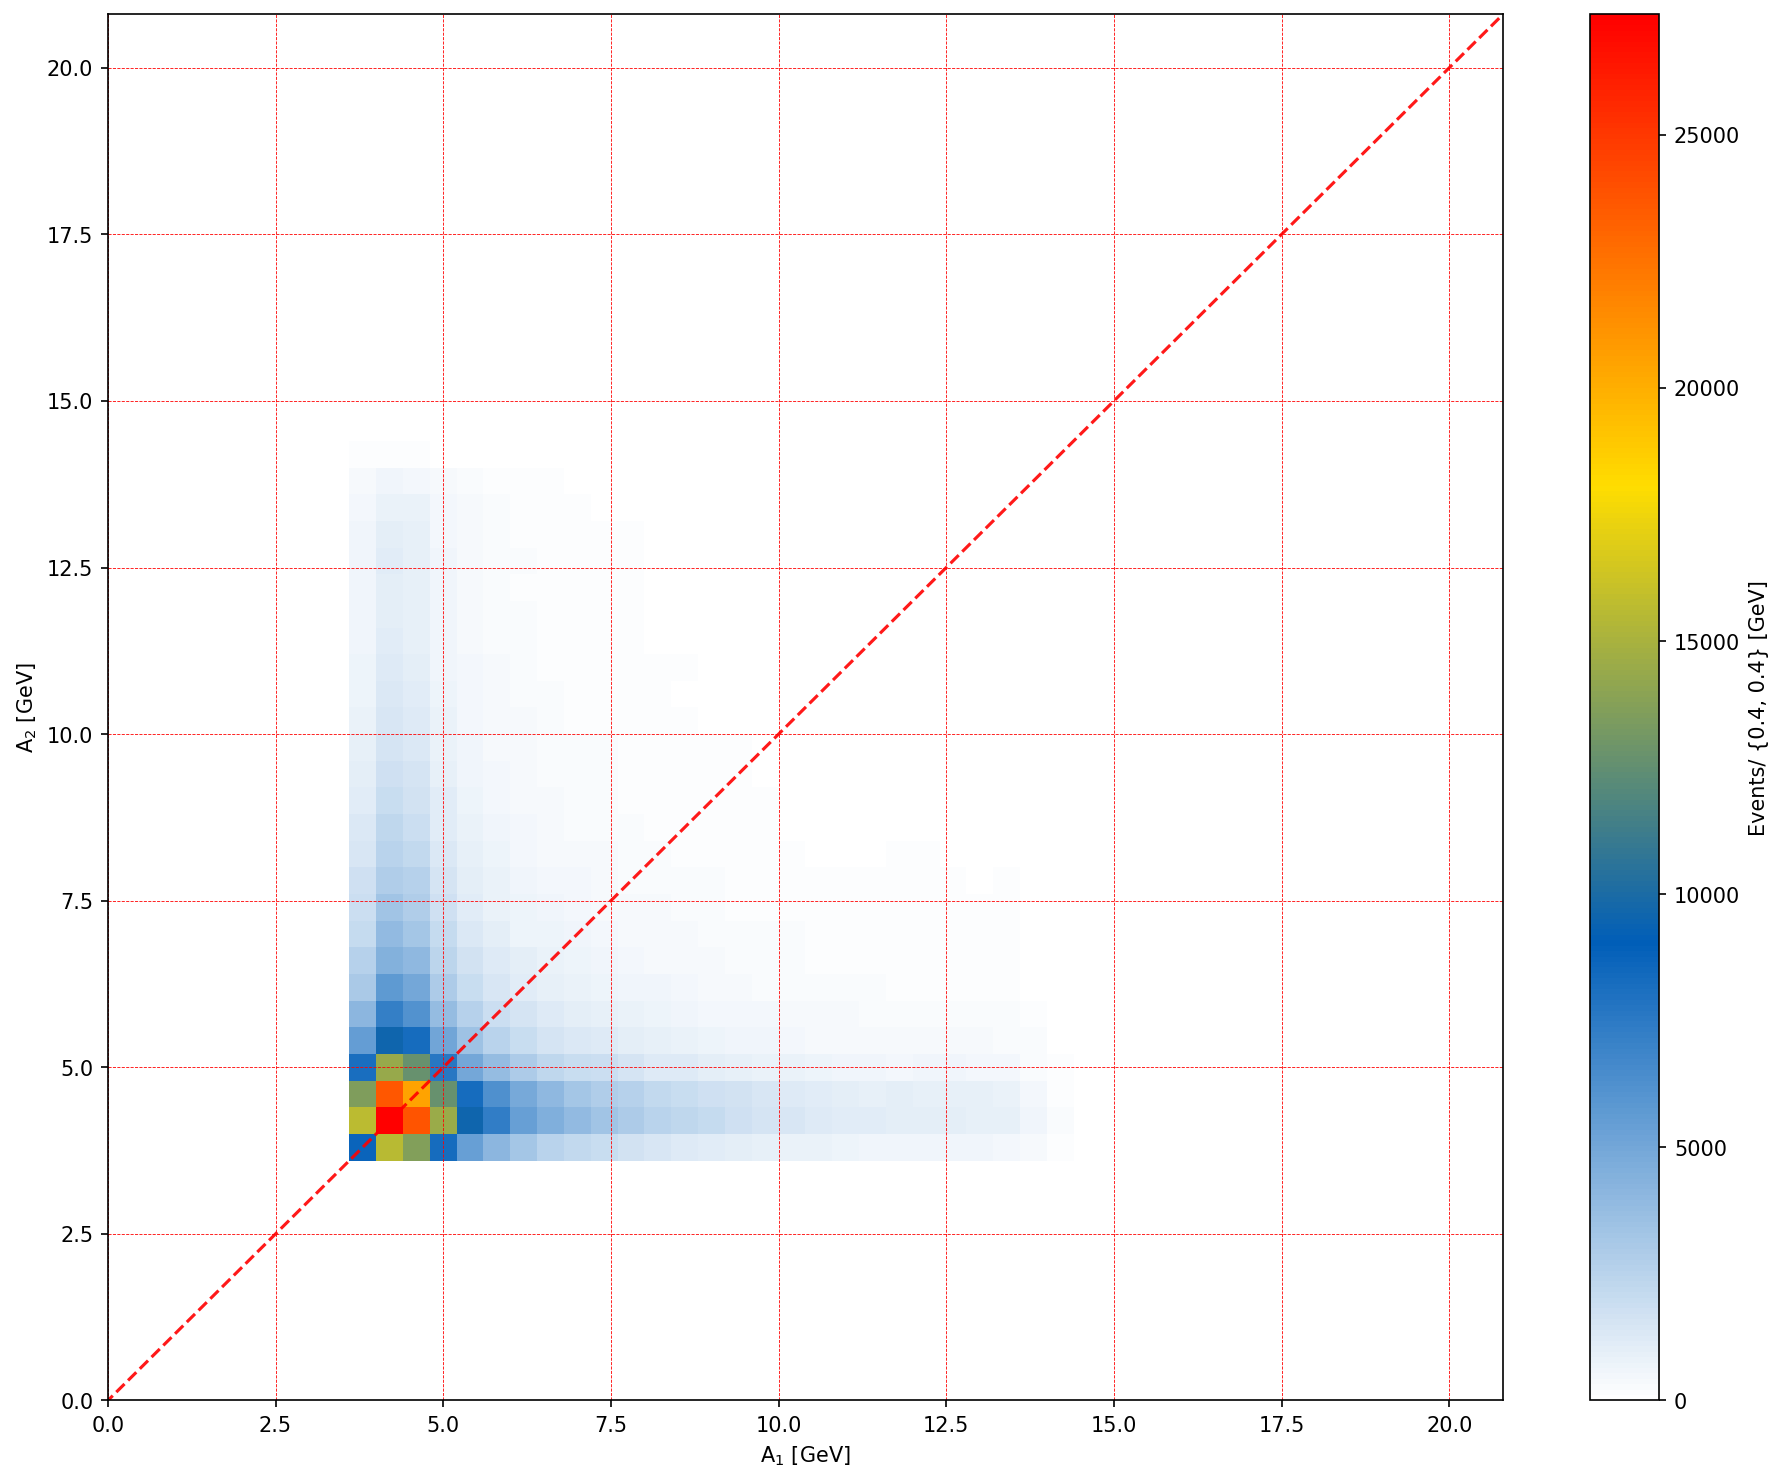

Signal Mass :  4


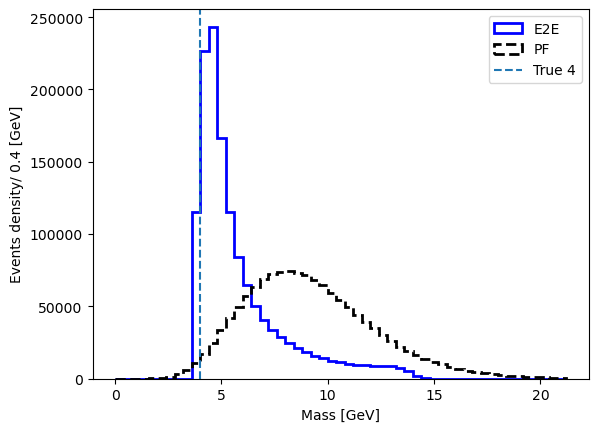

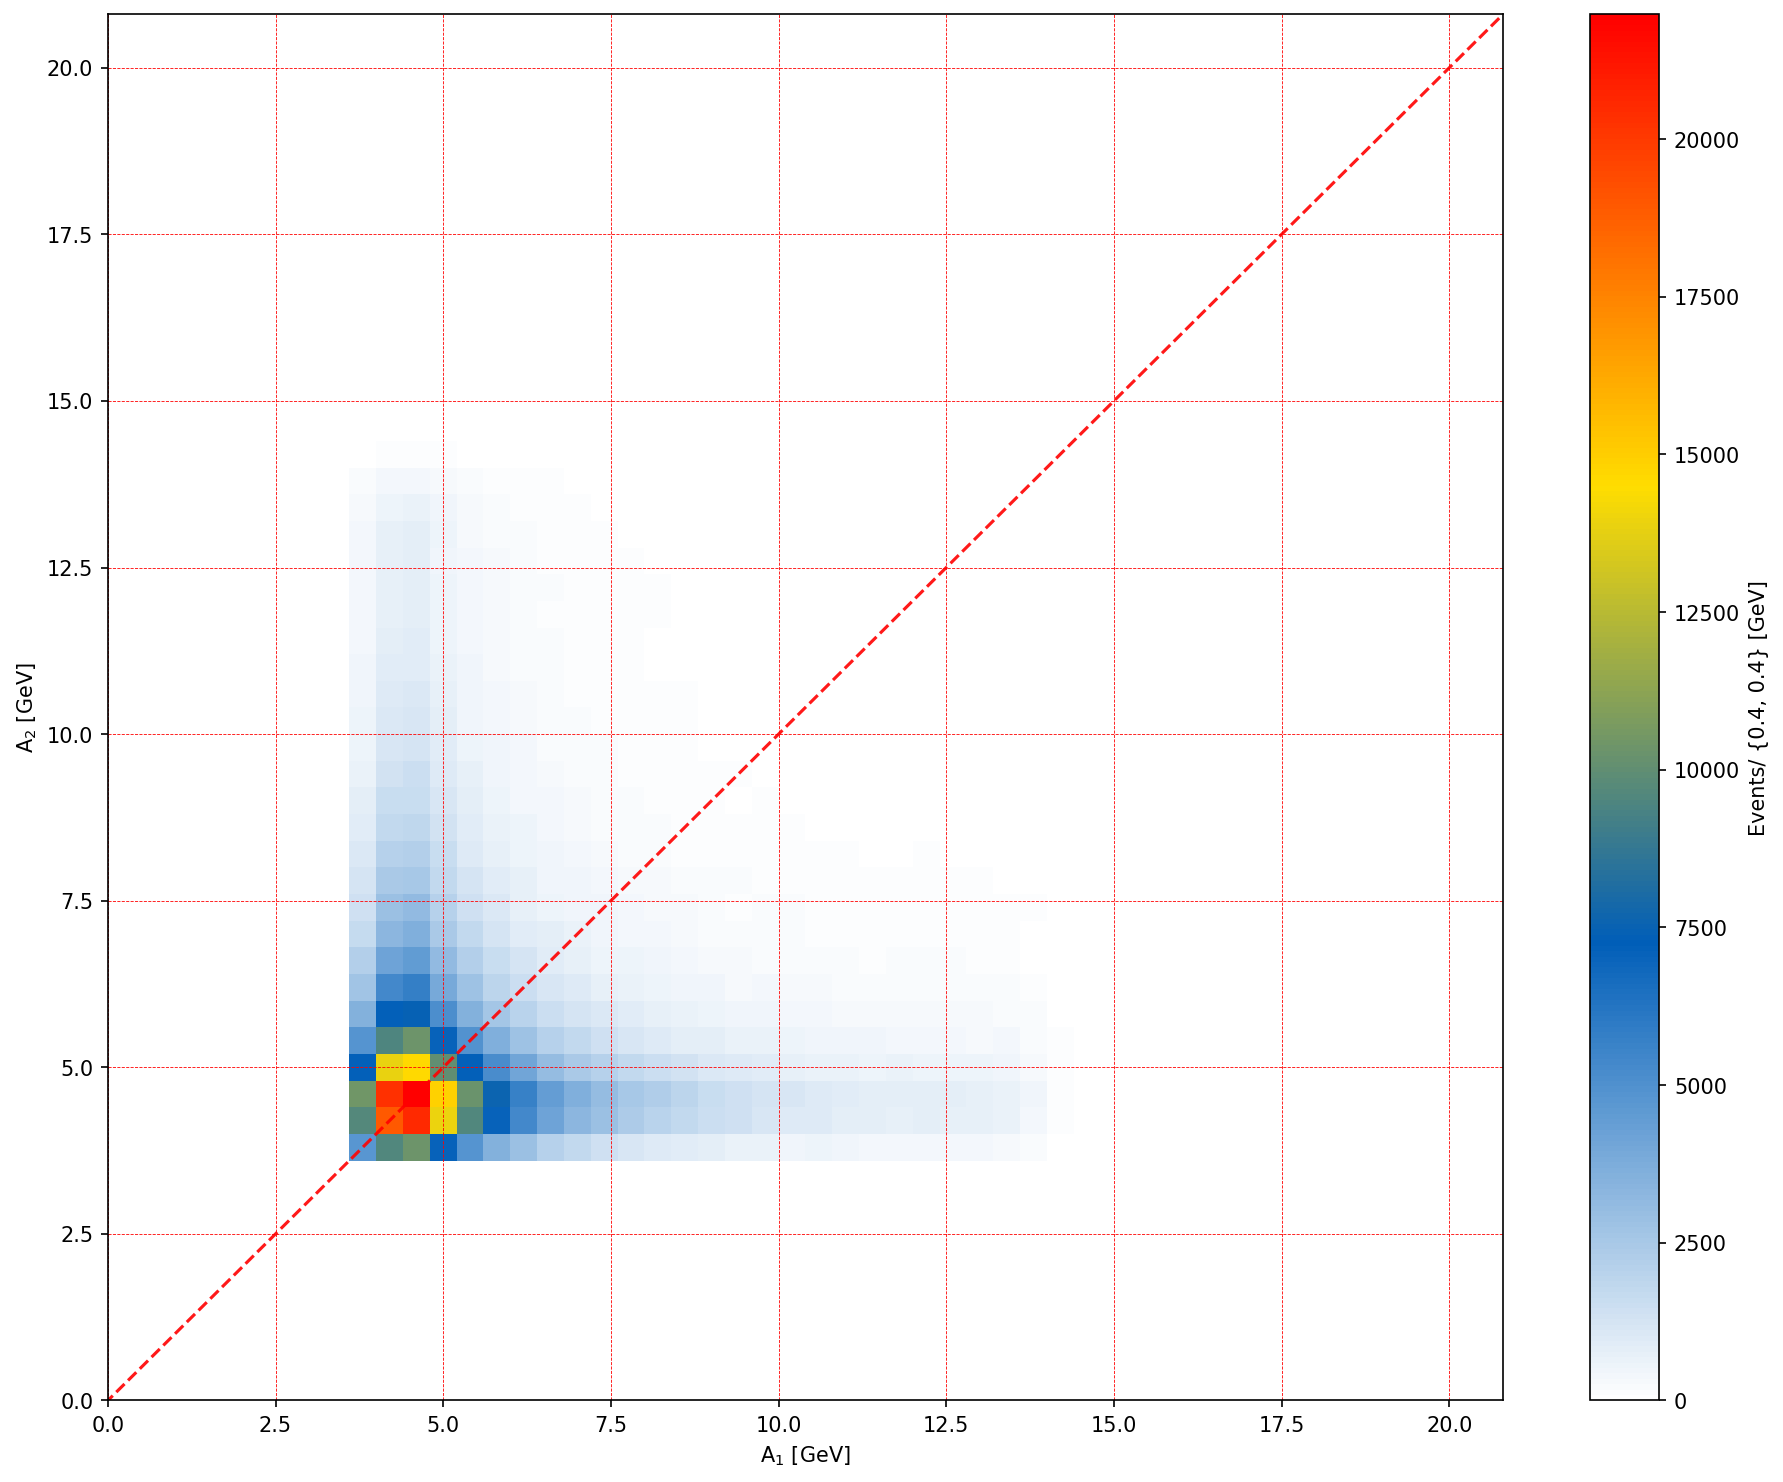

Signal Mass :  5


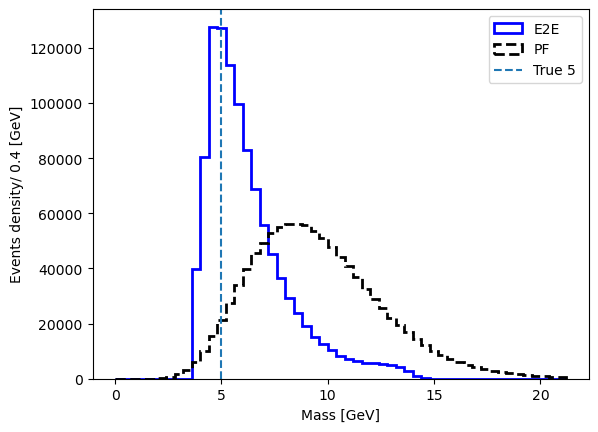

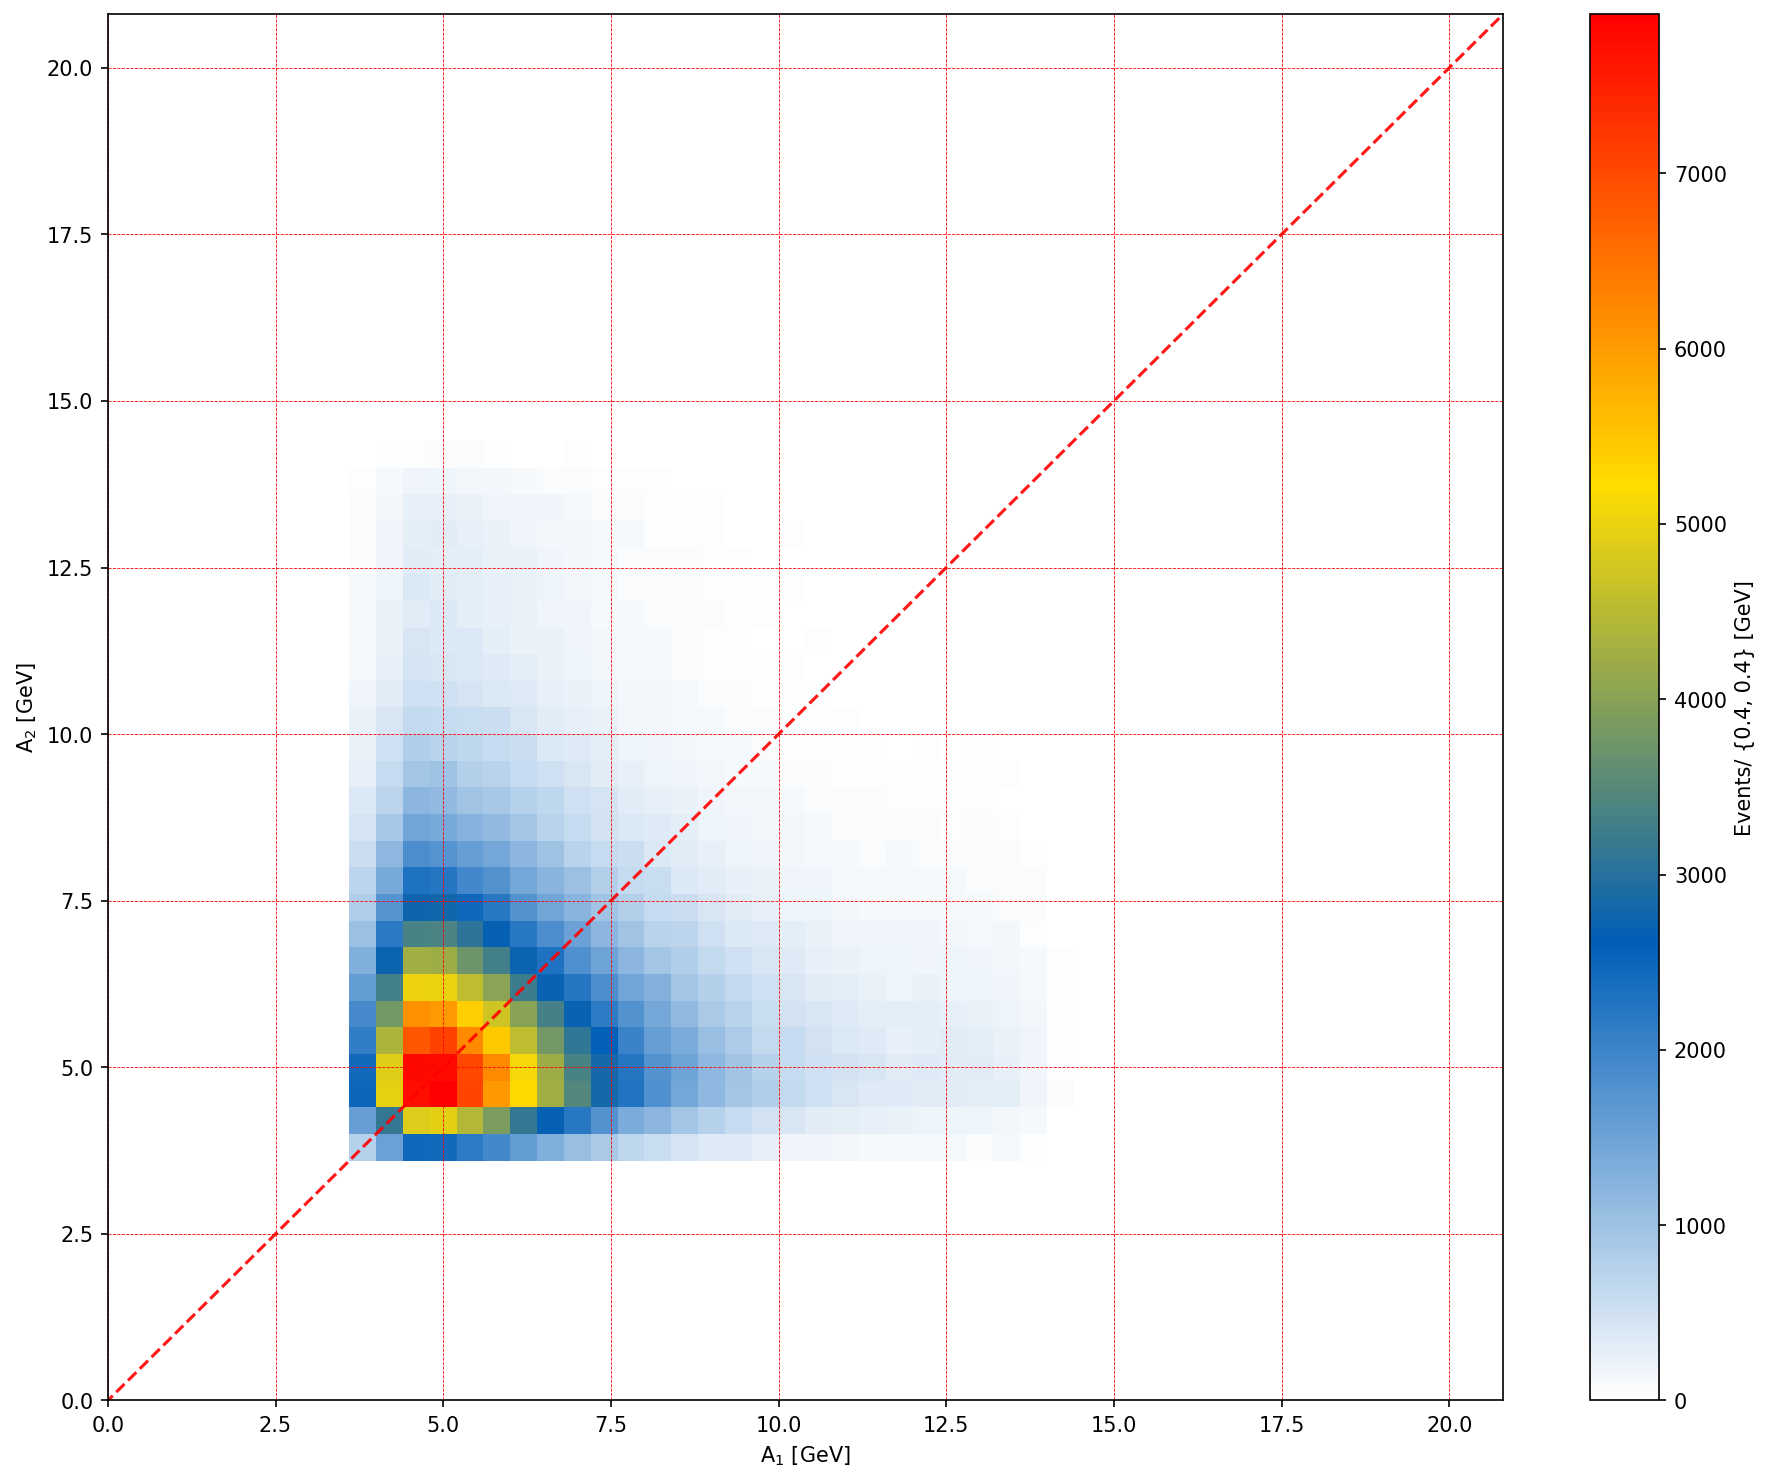

Signal Mass :  6


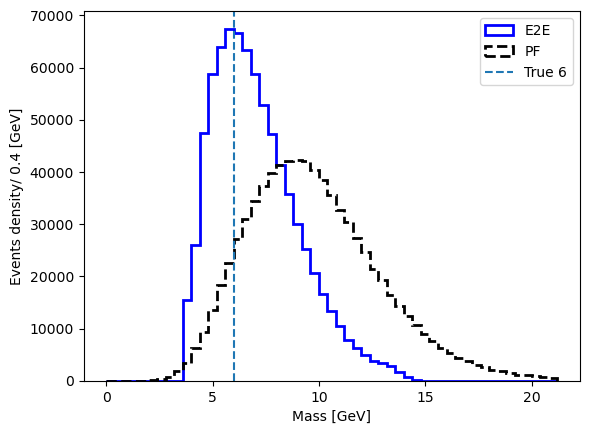

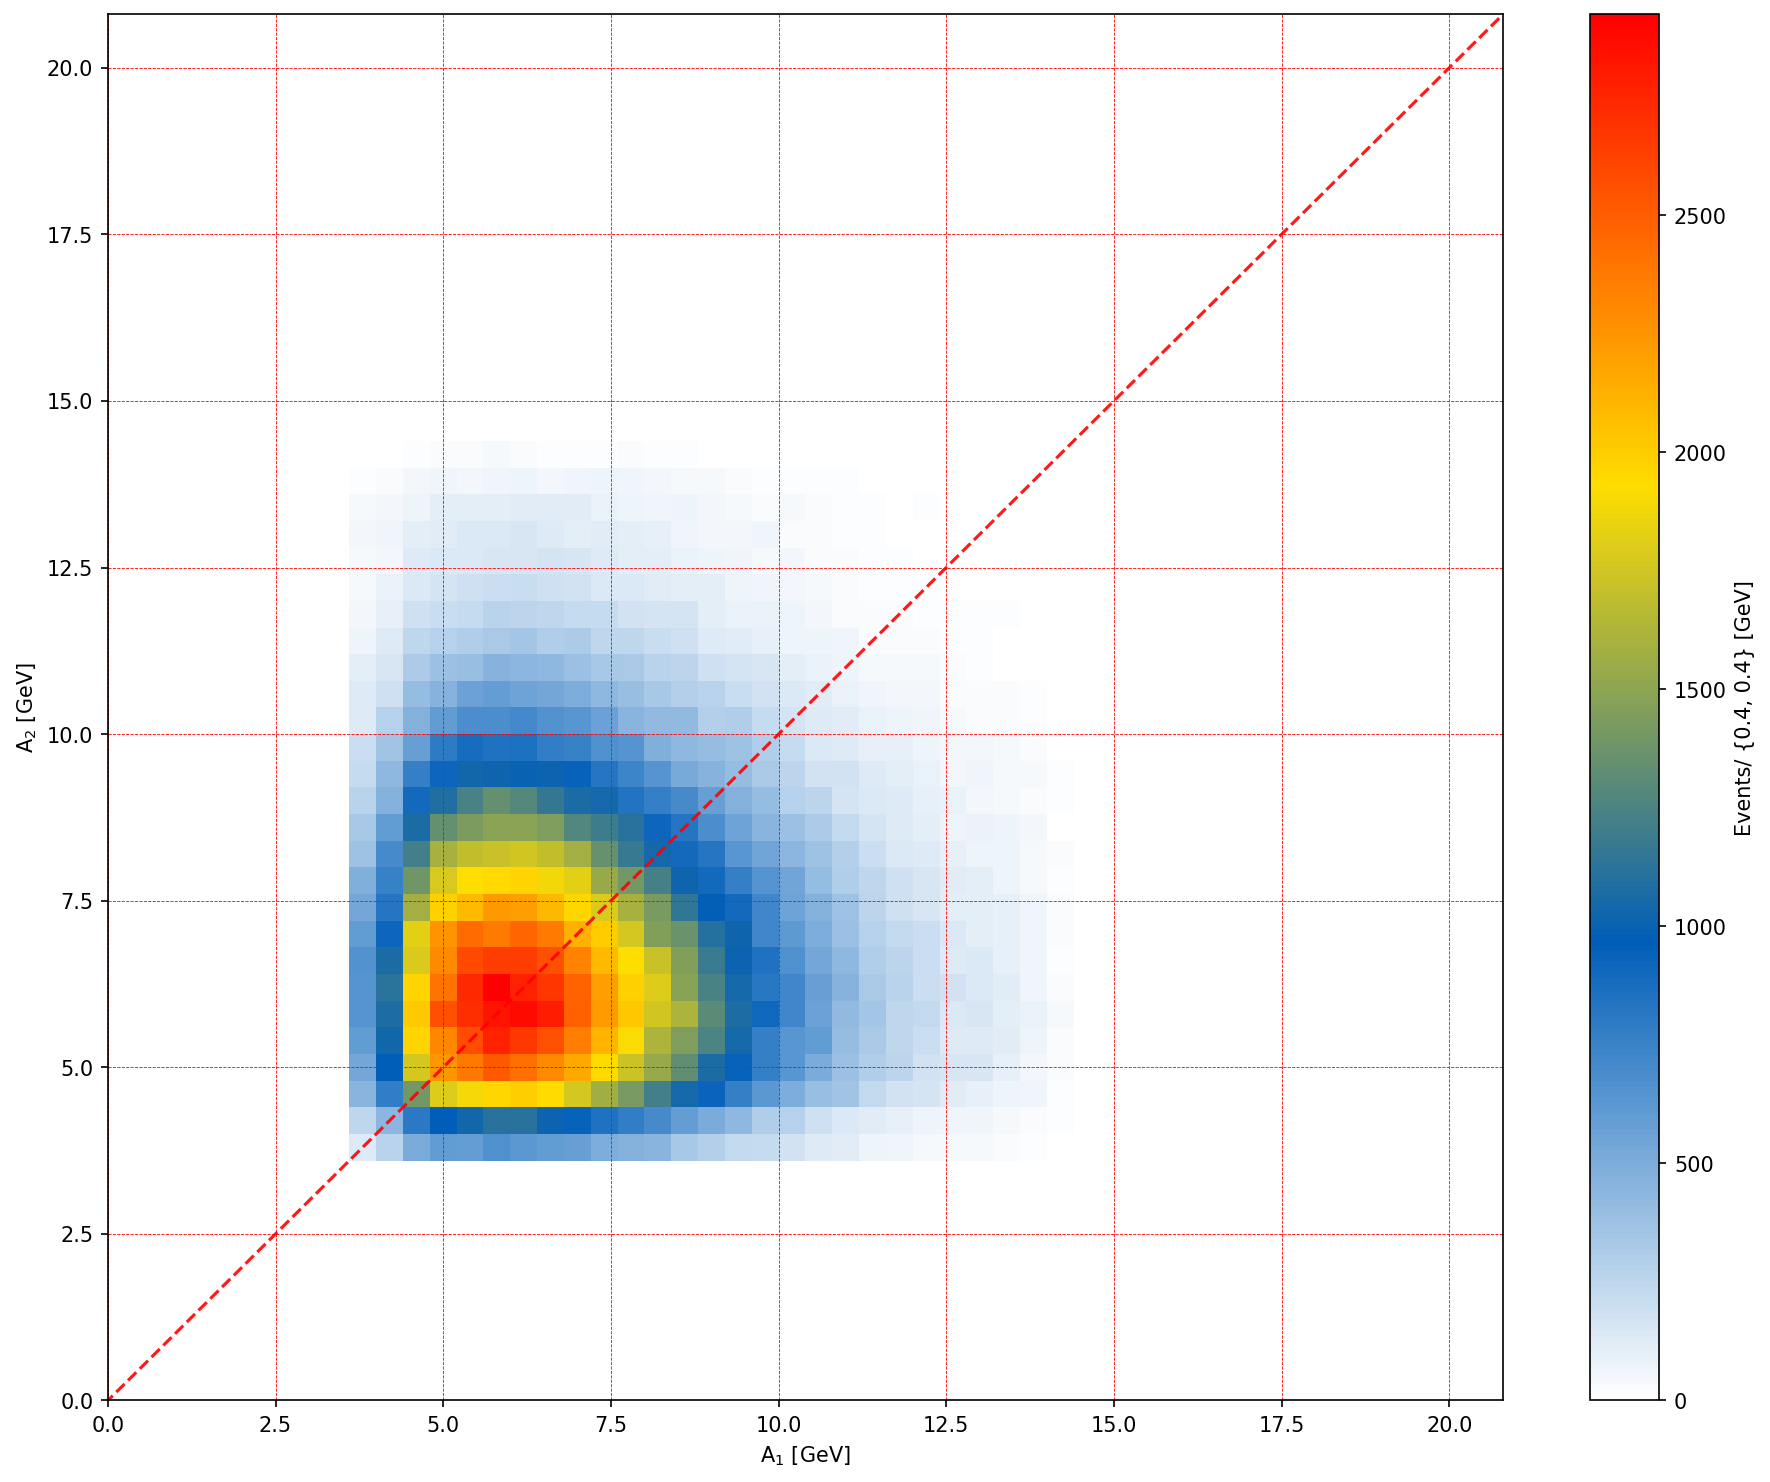

Signal Mass :  8


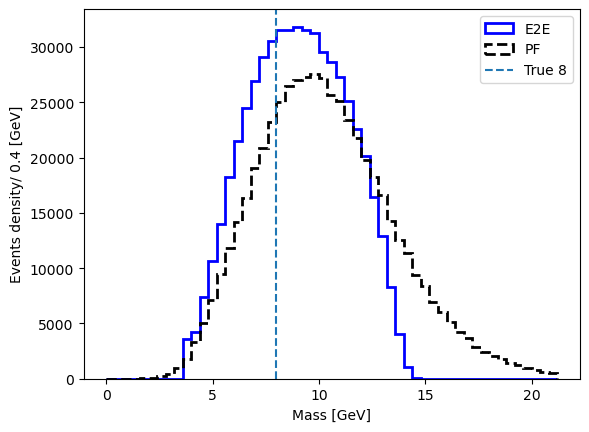

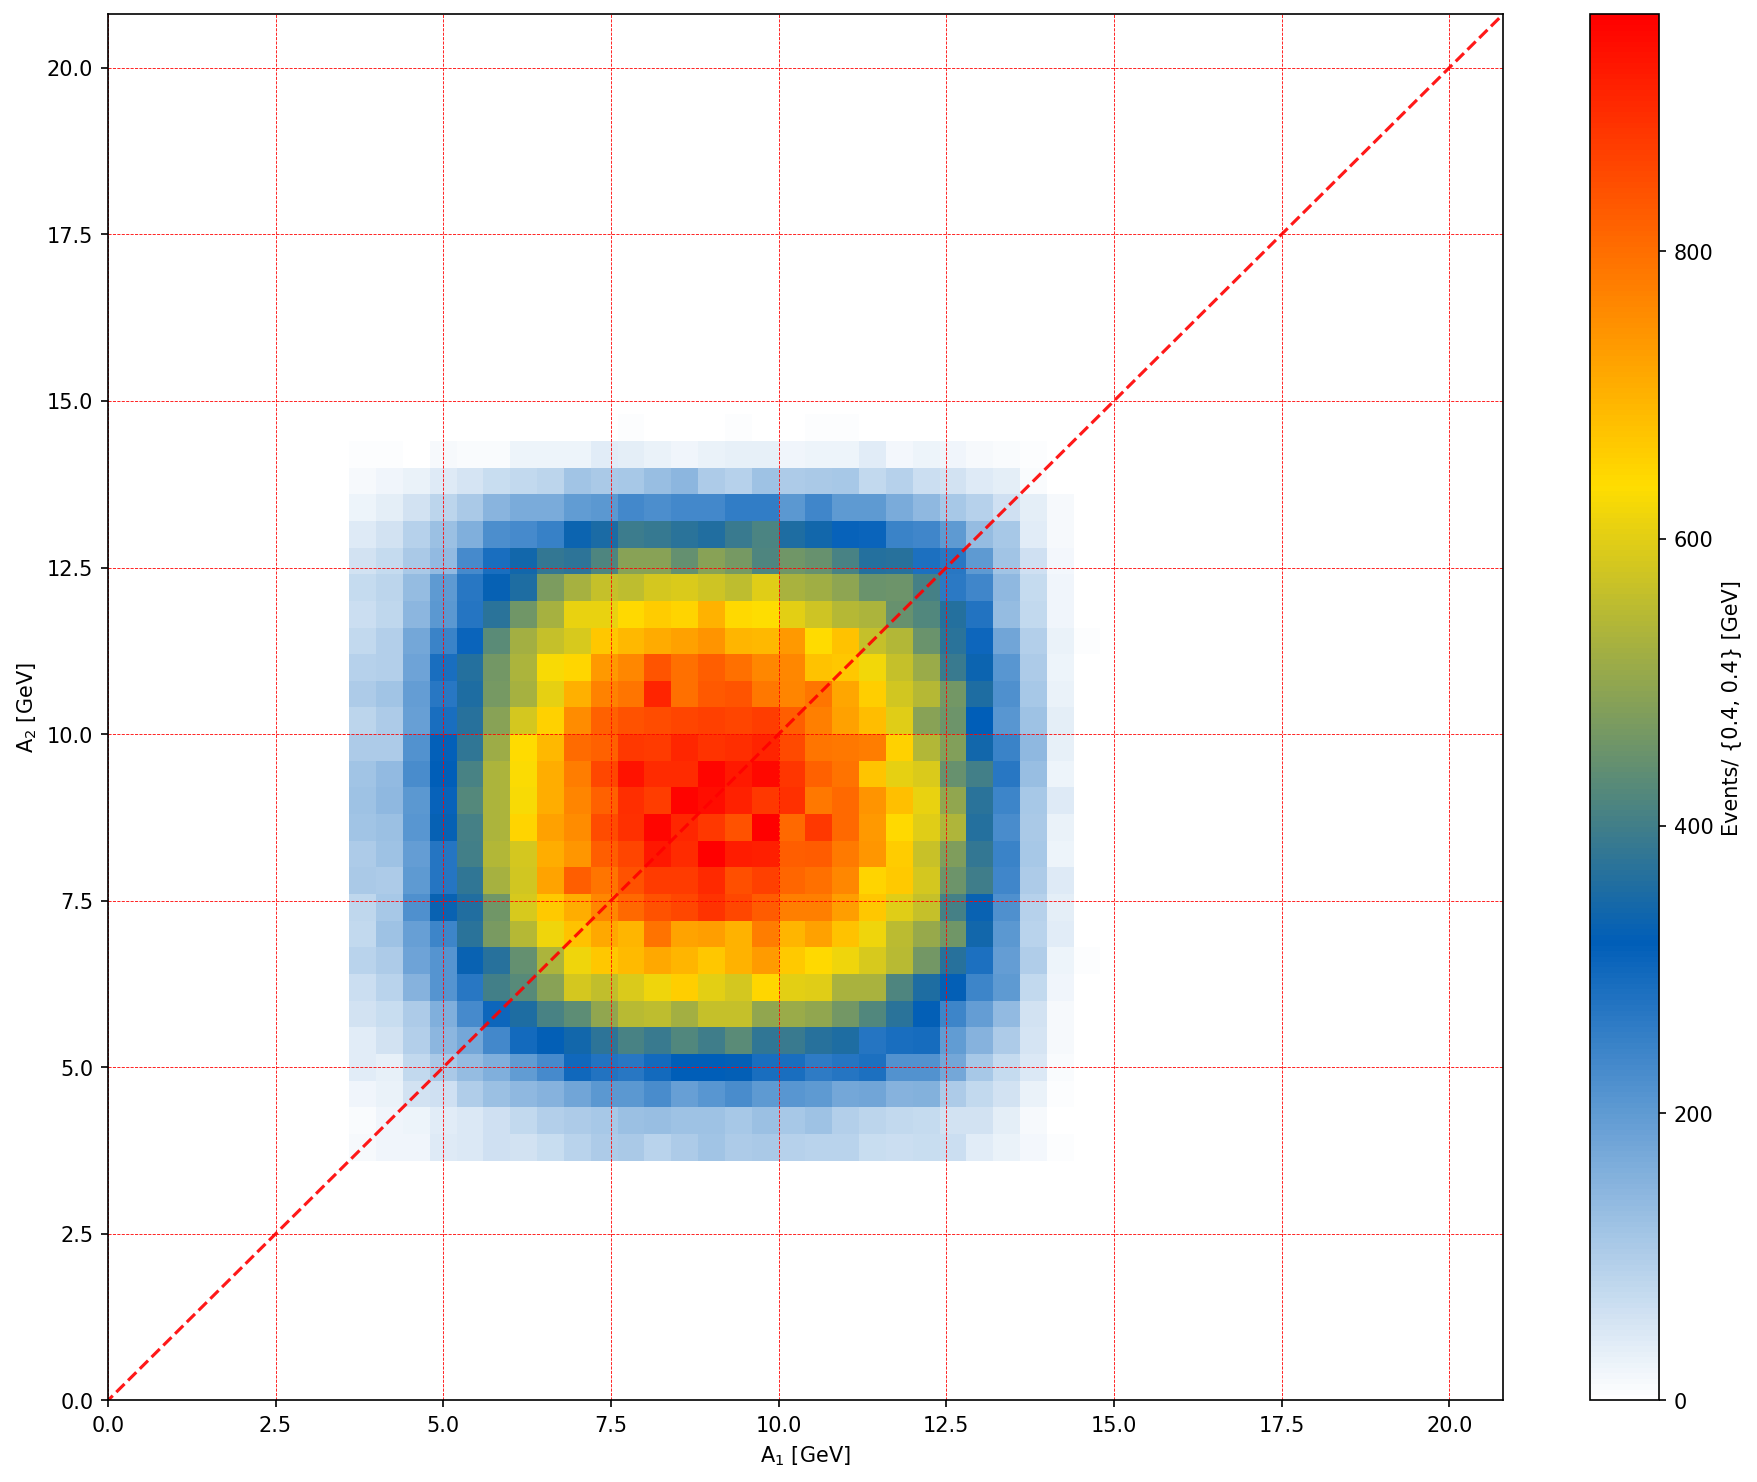

Signal Mass :  10


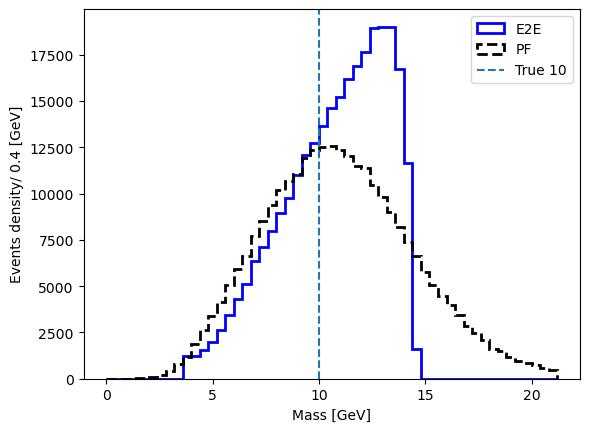

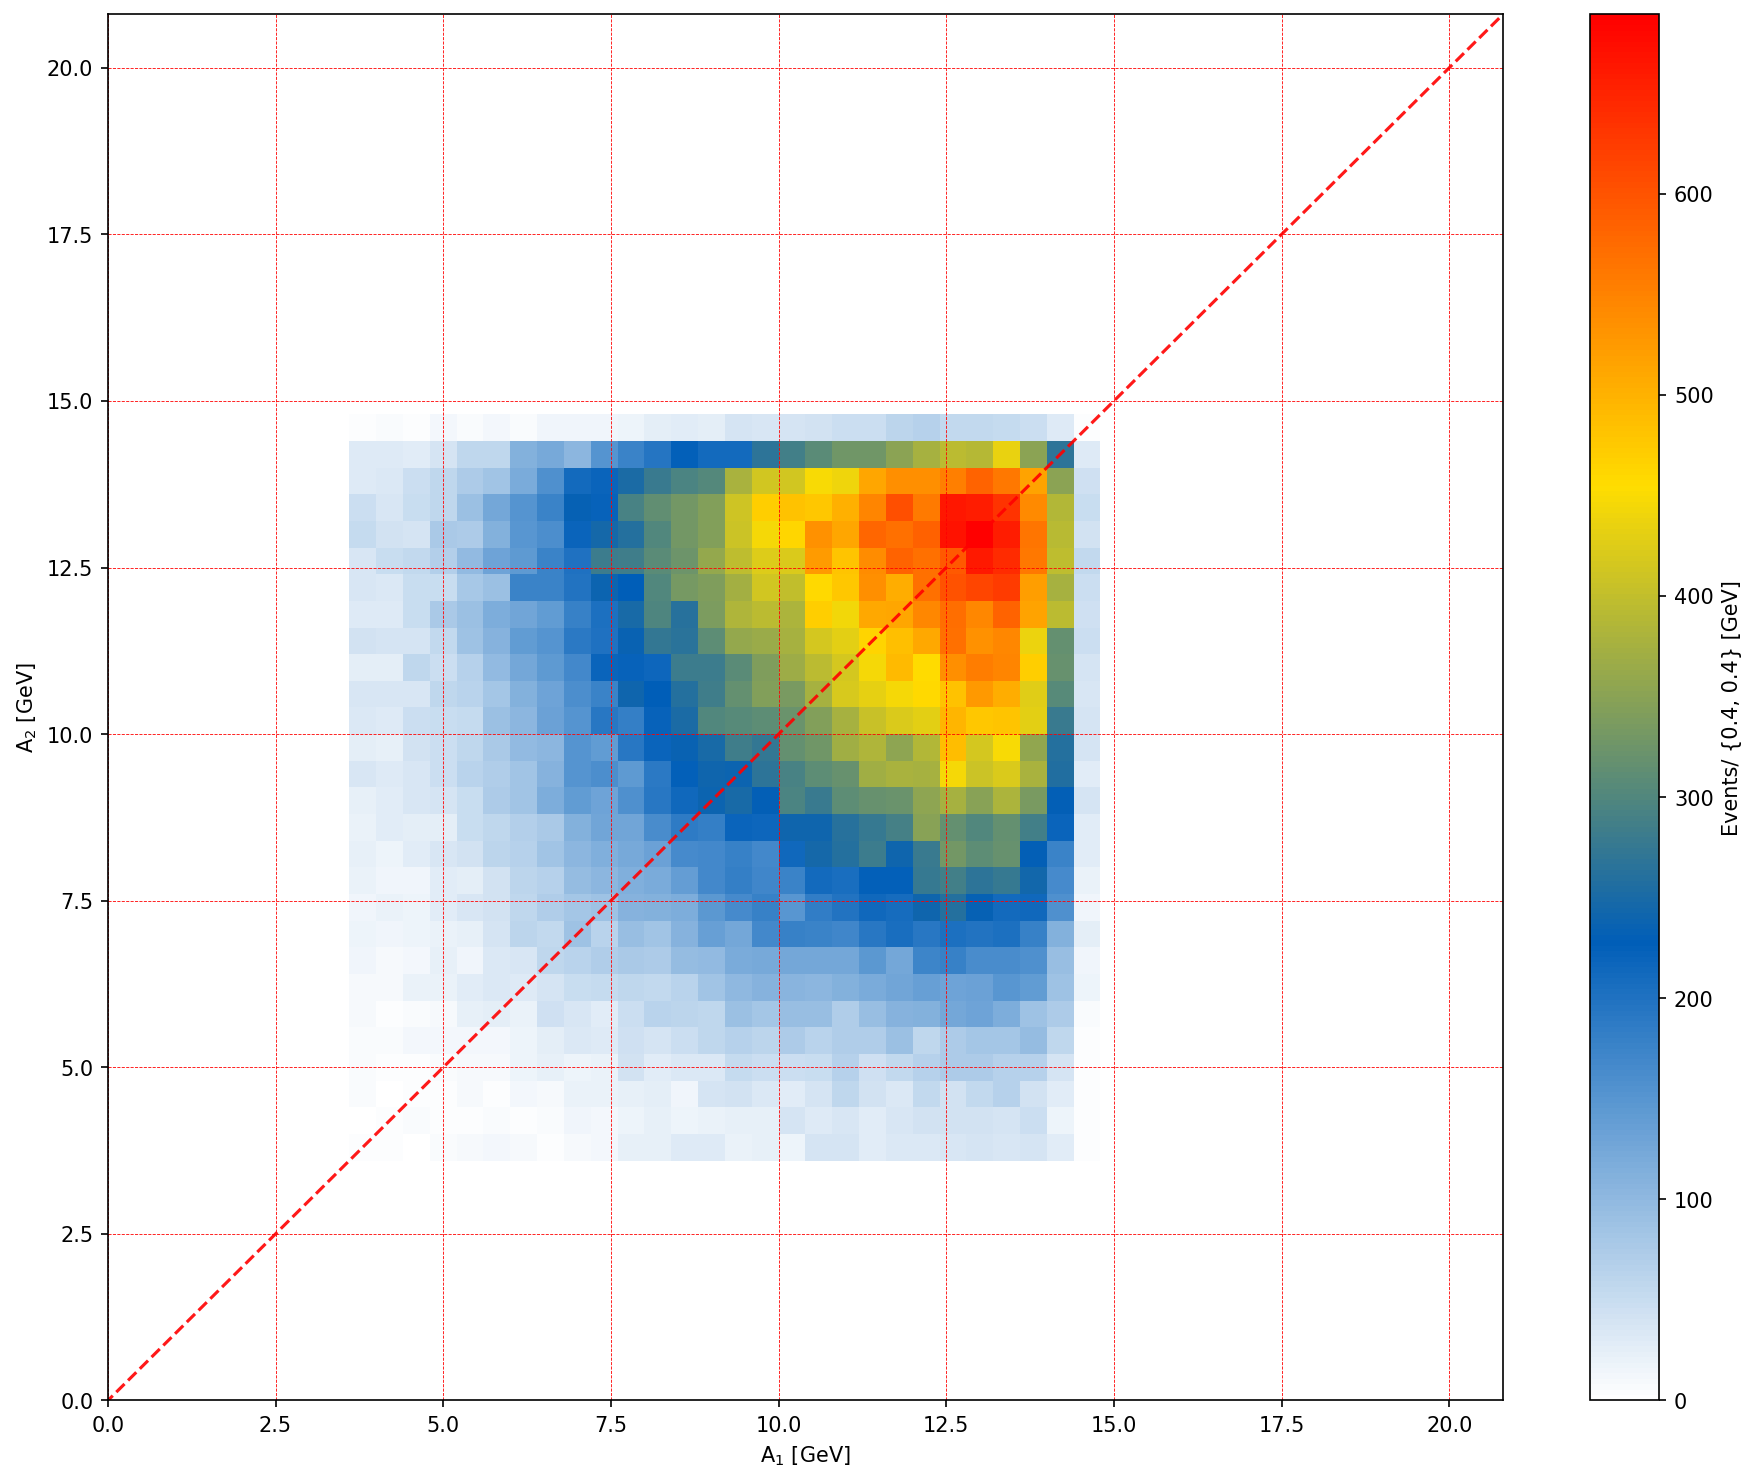

Signal Mass :  12


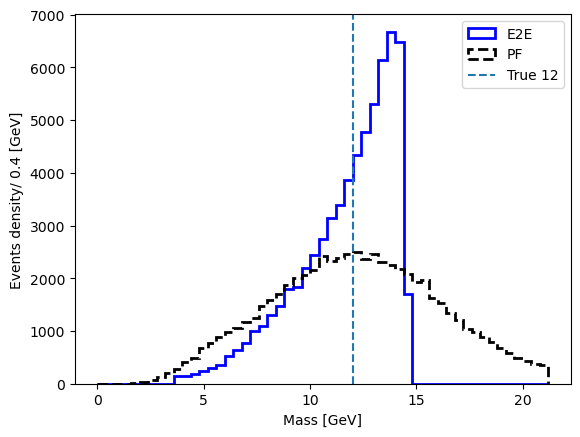

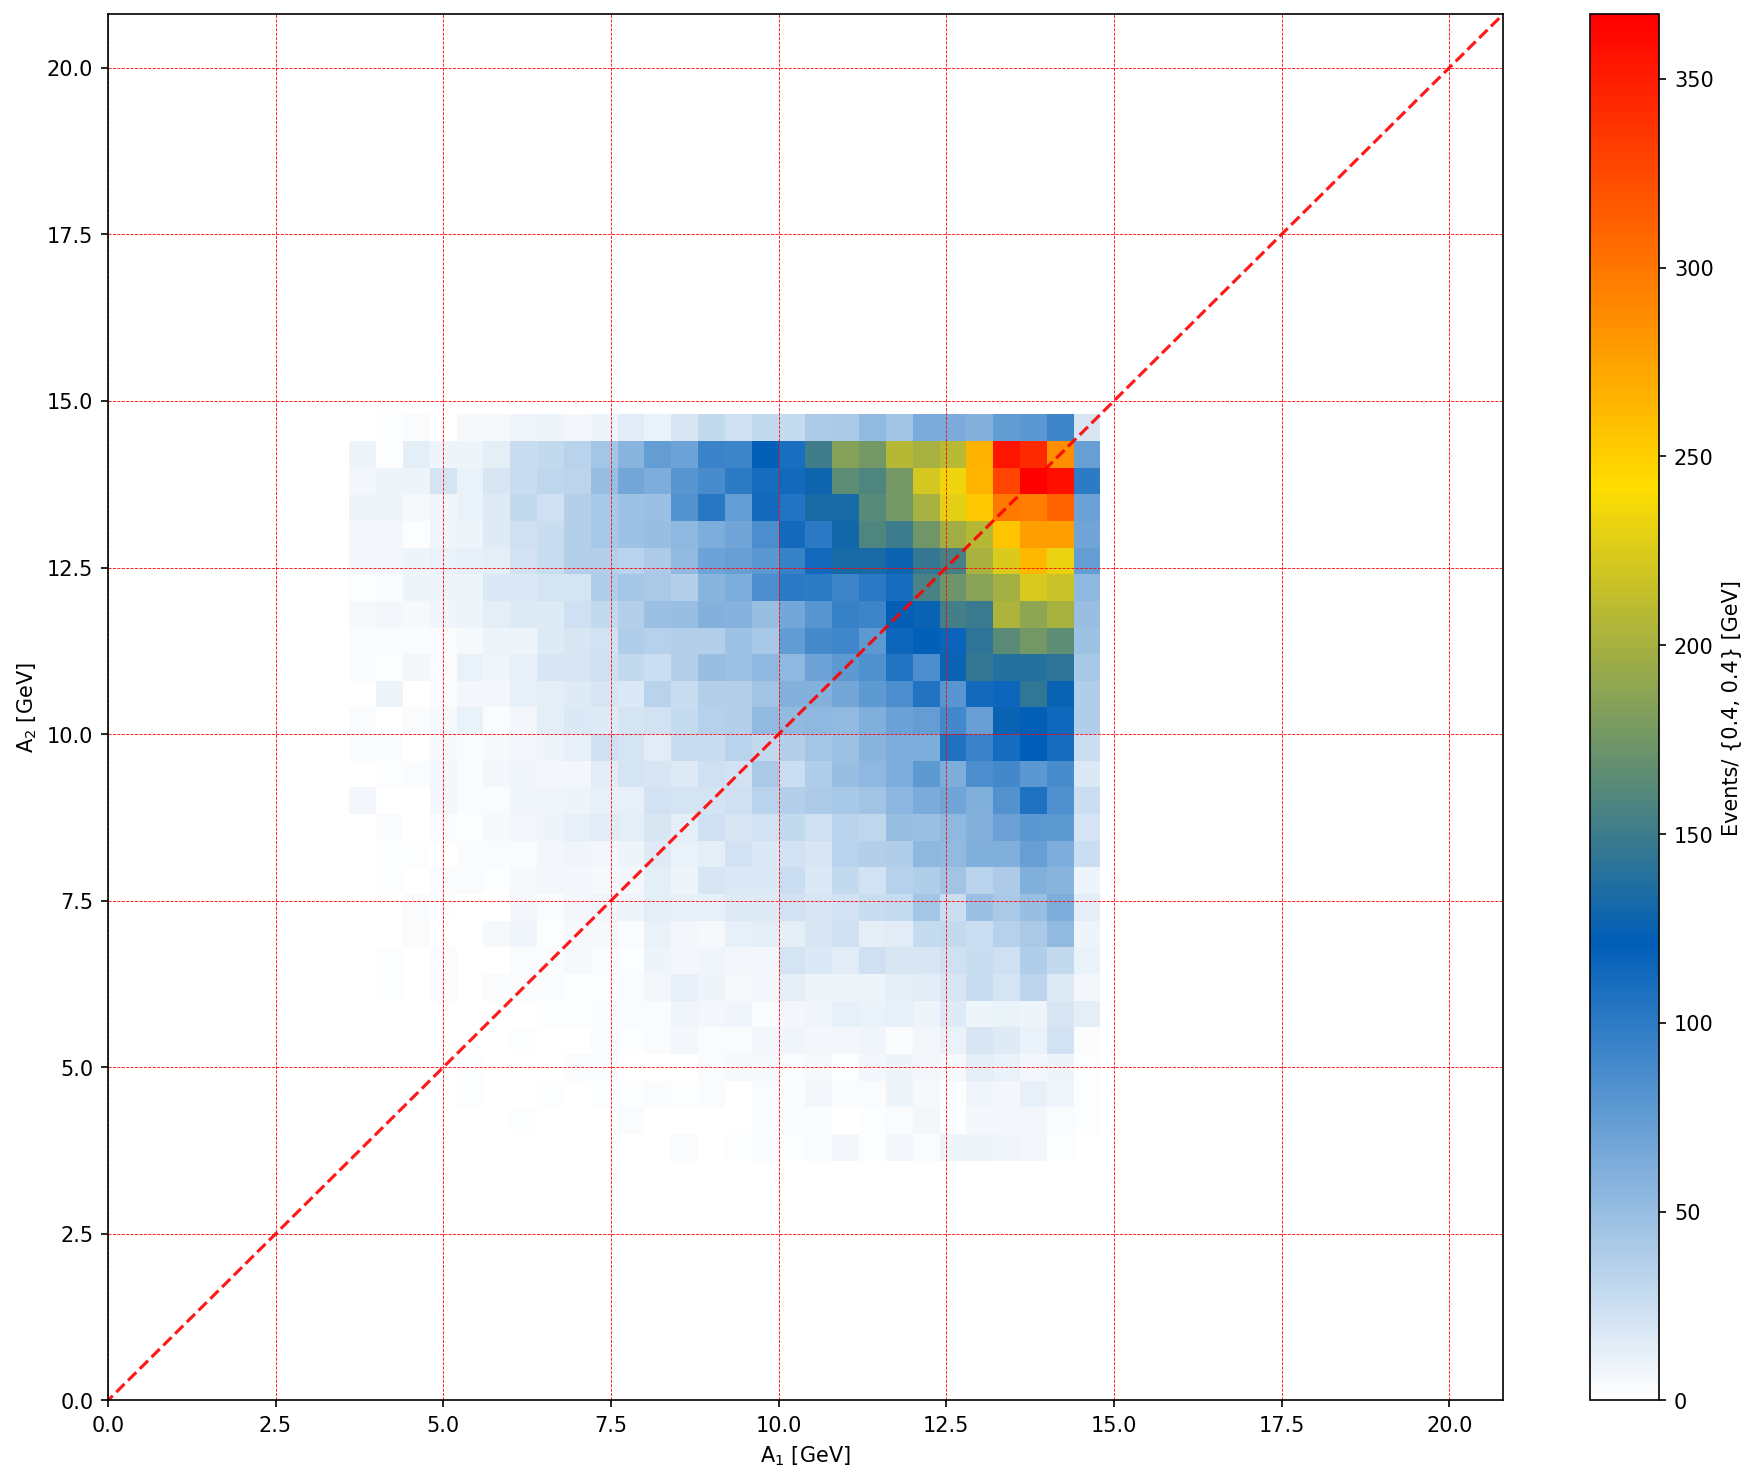

Signal Mass :  14


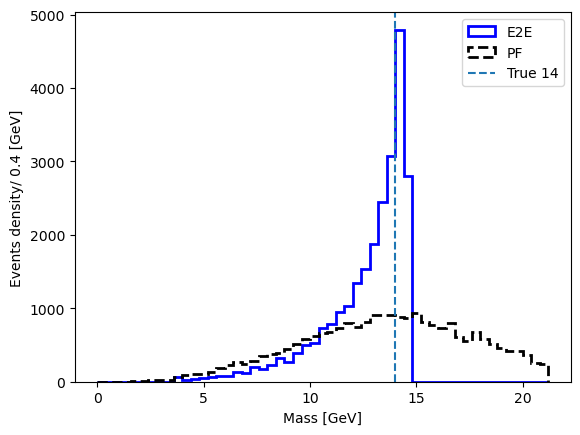

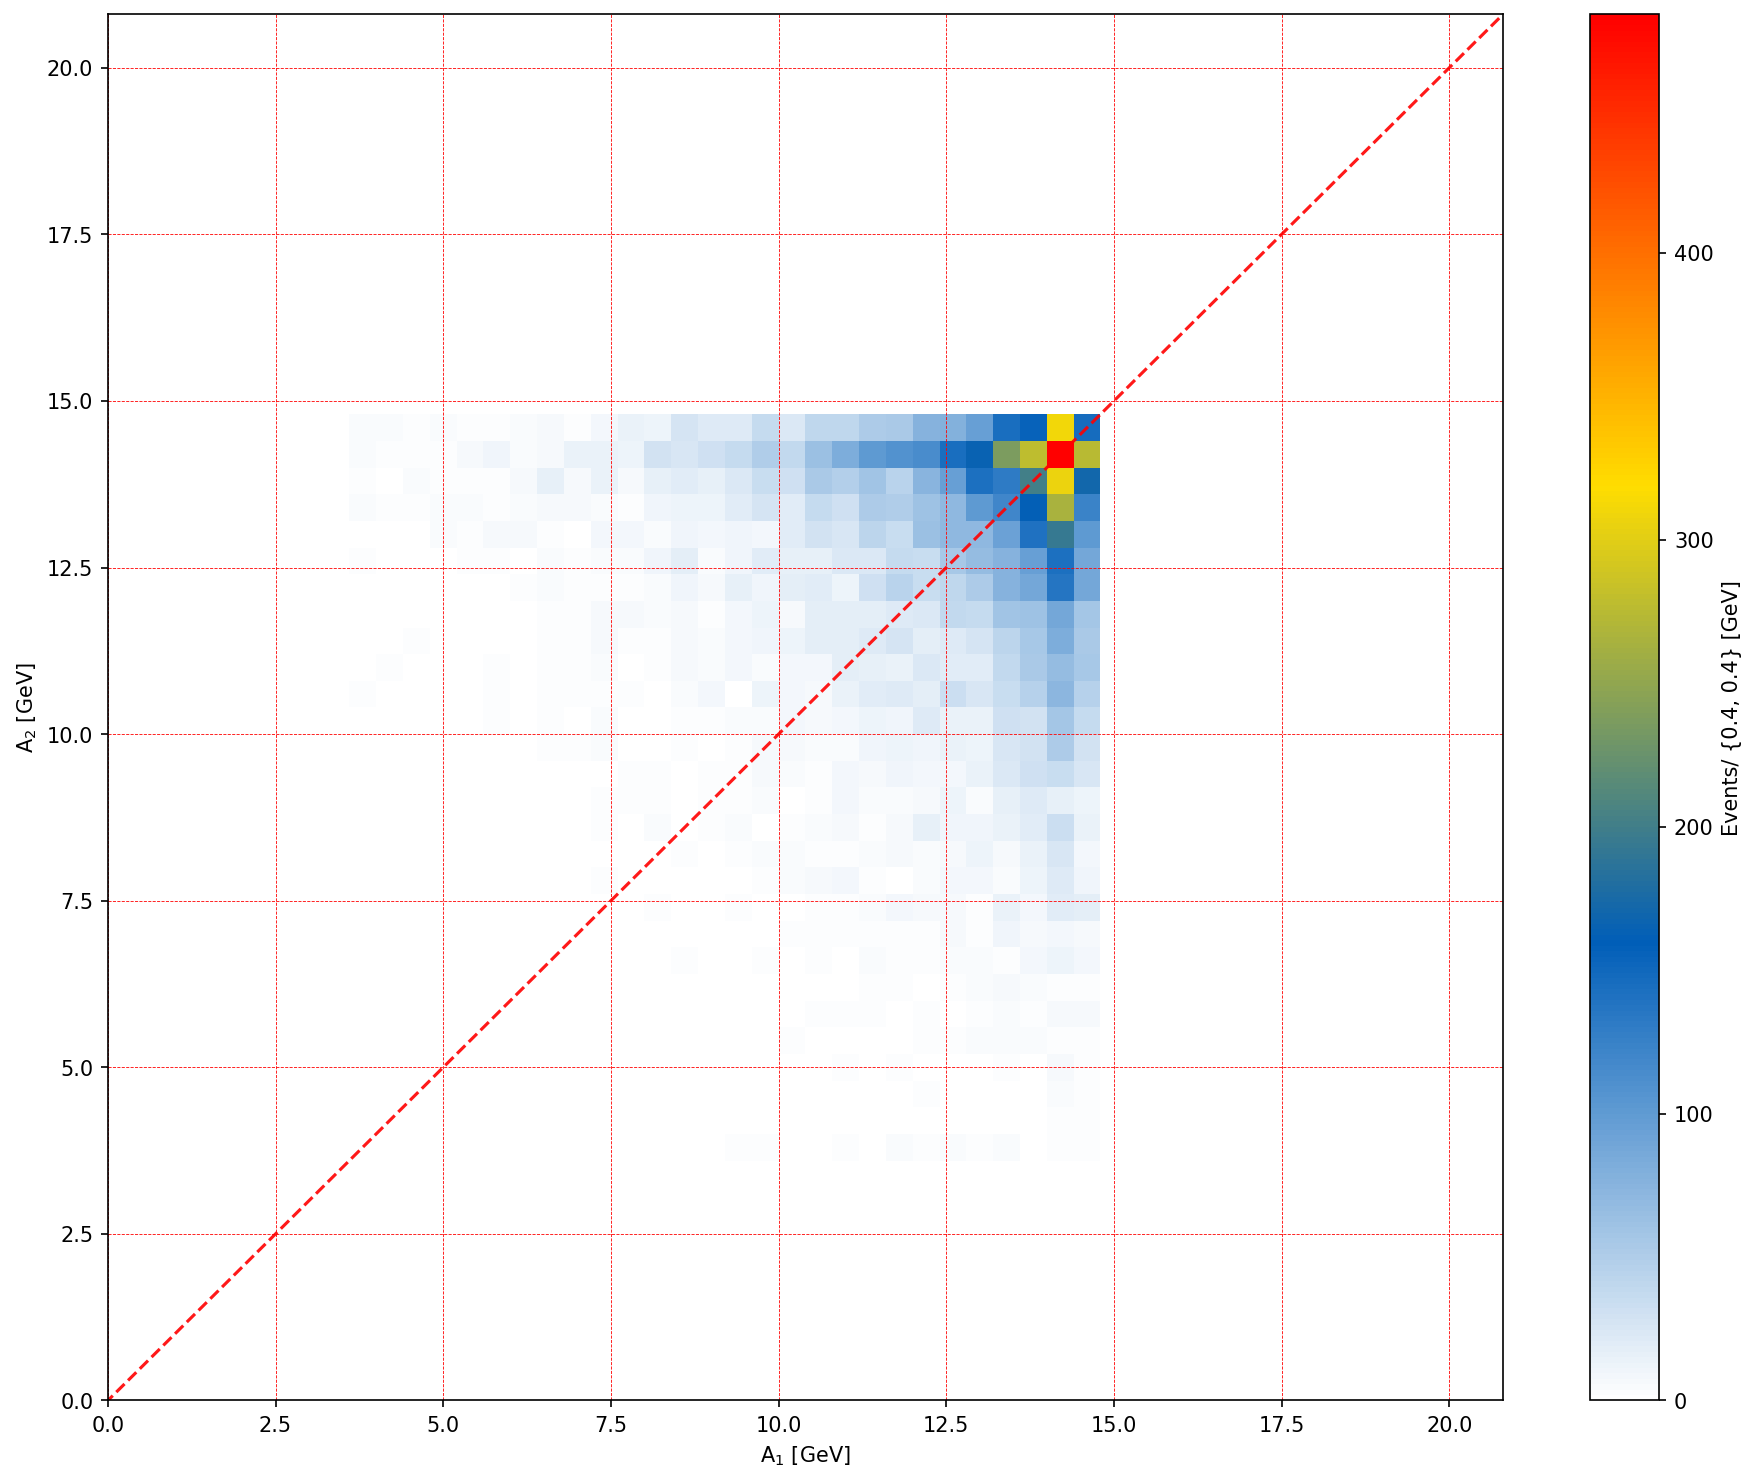

In [14]:
for m in Masses:
    plot_signal(Mass = m,corrected=True)

### Fitting with Weibull distribution

In [ ]:
# Mass = '3p7'
# mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
# print(mass)
# paths=np.sort(glob.glob(f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
# assert len(paths) > 0


# m0_min = 0.8
# m0_max = 17.2
# bin_size = 0.4

# infile = open(f"{paths[0]}", "rb")
# data = pickle.load(infile)

# infile.close()
# m_true_ = data["m_true"]
# m_pred_ = data["m_pred"]
# m0_ = data["m0"]

# m0 = 1.2
# m0_max = 20
# bin_size=0.4

# # Fit a Weibull distribution to the data
# params = stats.weibull_min.fit(m_pred_)
# shape, loc, scale = params
# stats.weibull_min.pdf(x, shape, loc, scale)
# x = np.linspace(min(m_pred_), max(m_pred_), 1000)
# y = stats.weibull_min.pdf(x, shape, loc, scale)
# print("shape, loc, scale", shape, loc, scale)
# fig, ax = plt.subplots()
# plt.hist(np.array(m_pred_).flatten(), density = True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='E2E')
# # plt.hist(np.array(m0_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='black', linewidth=2, label='PF')
# plt.plot(x, y,linestyle='--', color='red',label=f'Fitted Weibull')# shape:{shape:.2f}  loc:{loc:.2f}  scale:{scale:.2f} ')
# plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
# plt.xlim(0,20)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events density/ 0.4 [GeV]')
# plt.legend(loc='best')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.show() 



### After corection

In [ ]:
slope = 0.438
c =-3.967
def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

In [ ]:
plot_validation(corrected=True)

In [ ]:
plot_signal('14', True)
# plot_signal('4',False)